# Analyzing data in depth for conclusions
### [RN] March 7th, 2021 11:13 AM

I duplicated yesterdays notebook to start where I left off. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Code from last notebook I will need again 

In [2]:
def ReadFile(infile): # read infile, return contents list of each line
    read = open(infile, 'r')
    lines = read.readlines()
    read.close()
    return(lines)

In [3]:
### Import data 

f_scrape="AllWeather.txt"
f_data="TotalOverTime.csv"

raw_scrape = ReadFile(f_scrape)[2:] # remove headers 
raw_data = ReadFile(f_data)[3:] # remove headers

# now i have raw data arrays for weather and the events per minute. 


In [4]:
### split raw data 
# this set starts on 2/16 at 4 pm and ends 3/1 at 11 am. 
# using t[] in scipy library on data collection end 

n = len(raw_data)
avg, std, var, rng = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
measure_date = []
for i in range(len(raw_data)):
    s0 = raw_data[i].split("---") # this marker divides different sections in line
    d = s0[1].split("_Hour")
    datetime=d[0][:3] + "/" + d[0][3:] + "/21 " + d[1].strip() + ":00:00" # date in same format as AllWeather
    measure_date.append(datetime)
    s2 = s0[2].split(' ') # now extract the incident data 
    IPM_mean = s2[2][:len(s2[2])-1] # average incidents per minute across hour
    IPM_sigma = s2[3][:len(s2[3])-1] # standard deviation of average incidents per min across hour
    IPM_var = s2[4][:len(s2[4])-1] # variance incidence per minute across hour 
    IPM_range = s2[5][:len(s2[5])-1]
    avg[i] = IPM_mean
    std[i] = IPM_sigma
    var[i] = IPM_var
    rng[i] = IPM_range

print(measure_date)

    

[' 02/16/21 16:00:00', ' 02/16/21 17:00:00', ' 02/16/21 18:00:00', ' 02/16/21 19:00:00', ' 02/16/21 20:00:00', ' 02/16/21 21:00:00', ' 02/16/21 22:00:00', ' 02/16/21 23:00:00', ' 02/17/21 12:00:00', ' 02/17/21 13:00:00', ' 02/17/21 14:00:00', ' 02/17/21 15:00:00', ' 02/17/21 16:00:00', ' 02/17/21 17:00:00', ' 02/17/21 18:00:00', ' 02/17/21 19:00:00', ' 02/17/21 20:00:00', ' 02/17/21 21:00:00', ' 02/17/21 22:00:00', ' 02/17/21 23:00:00', ' 02/17/21 24:00:00', ' 02/18/21 1:00:00', ' 02/18/21 2:00:00', ' 02/18/21 3:00:00', ' 02/18/21 4:00:00', ' 02/18/21 5:00:00', ' 02/18/21 6:00:00', ' 02/18/21 7:00:00', ' 02/18/21 8:00:00', ' 02/18/21 9:00:00', ' 02/18/21 10:00:00', ' 02/18/21 11:00:00', ' 02/18/21 12:00:00', ' 02/18/21 13:00:00', ' 02/18/21 14:00:00', ' 02/18/21 15:00:00', ' 02/18/21 16:00:00', ' 02/18/21 17:00:00', ' 02/18/21 18:00:00', ' 02/18/21 19:00:00', ' 02/18/21 20:00:00', ' 02/18/21 21:00:00', ' 02/18/21 22:00:00', ' 02/18/21 23:00:00', ' 02/18/21 24:00:00', ' 02/19/21 1:00:00

In [5]:
### split weather scraped data

m = len(raw_scrape)

scrape_date, collect_date, wind, visibility, weather = [], [], [], [], [], 
sky, T, Dp, humidity = [], [], [], [], 
heat_index, P_altimeter, P_sealev, prec_1hr = [], [], [], [], 
count = 0
for i in range(len(raw_scrape)):
    s0 = raw_scrape[i].split("(scraped):")
    scrape = s0[0]
    dt = scrape.split(",")
    datetime = dt[0] + dt[1]
    cond = s0[1].split(", ")
    cd = datetime[:3] + cond[0].strip() + "/21 " + cond[1].strip() + ":00"
    try:
        if str(collect_date[count].strip()) == str(cd.strip()):
            continue
        else:
            count = count + 1
    except:
        pass
    collect_date.append(cd)
    scrape_date.append(datetime)
    wind.append(cond[2])
    visibility.append(cond[3])
    weather.append(cond[4])
    sky.append(cond[5])
    T.append(cond[6])
    Dp.append(cond[7])
    humidity.append(cond[10].strip('%'))
    P_altimeter.append(cond[13])
    P_sealev.append(cond[14])


# get absolute value of wind 
wind_abs = np.zeros(len(wind)) # speed of wind, no direction 
for i in range(len(wind)):
    vals = ''
    test = wind[i]
    count = 0
    for j in range(len(test)):
        try:
            a = float(test[j])
            vals = vals + str(int(a))
        except:
            count = count +1 
            if count >1:
                    break
    try:
        wind_abs[i] = float(vals)
    except:
        wind_abs[i] = 0


In [6]:
### recreate histogram for day average 

days, day_stats = ["02/16"], []  # start on first day of collection 
running_avg, running_stdSq = [], []
count = 0
for i in range(1, len(avg)):
    date = measure_date[i][:6]    
    if str(date).strip() == str(days[count]).strip(): # if the day we are on now is same as yesterday 
        running_avg.append(avg[i])
        running_stdSq.append(float(std[i])**2)
    else:
        x = sum(running_avg)/len(running_avg)
        sigma = ((sum(running_stdSq))**(0.5))*(1/len(running_stdSq)) # propogating standard deviation on each hour 
        day_stats.append([date, x, sigma])
        days.append(date)
        running_avg, running_stdSq = [], []
        count = count + 1
print(day_stats)
print("I expect 18 days total excluding partial first 2/16, and including today 3/6. I got ", len(day_stats), " data points by distilling data into days.")

[[' 02/17', 84.04523809523809, 3.587363161075386], [' 02/18', 83.64549180327869, 2.6958594304227548], [' 02/19', 83.33077928248991, 1.9736820221120535], [' 02/20', 84.10487051556188, 2.096765638052274], [' 02/21', 83.40077215490615, 2.0798339966699824], [' 02/22', 83.54309812306961, 1.9357892735497304], [' 02/23', 83.28985507246377, 1.935948219071465], [' 02/24', 84.0388096935139, 2.0647996552692782], [' 02/25', 83.75244713708722, 2.081830385671301], [' 02/26', 83.84539082917557, 2.1489169376309456], [' 02/27', 85.82407935376577, 1.9725232408264999], [' 02/28', 85.1908172962699, 2.1535775360436644], [' 03/01', 84.47832026609646, 2.0589524602175273], [' 03/02', 84.57903302447136, 2.15572575624491], [' 03/03', 86.69052031361369, 1.9898451546620584], [' 03/04', 86.21219572776951, 2.117578113119497], [' 03/05', 83.89713708719411, 2.282257294256964], [' 03/06', 84.30479923972439, 2.0259319103907125]]
I expect 18 days total excluding partial first 2/16, and including today 3/6. I got  18  da

In [7]:
### Encode weather data 
print(measure_date)
# filter measured data to remove measurements I dont have weather data for 
# coupled is array of arrays : [measured date, collect date, average IPM, std IPM, wind, sea level pressure, temperature, humidity]
count = 0
coupled = []
for i in range(len(measure_date)):
    search = measure_date[i].split(":")[0]+":"
    if search[len(search)-1] + search[len(search)-2] == '00':
        search[len(search)-1] = 4
        search[len(search)-2] = 2
    search_date = search[:9].strip()
    search_time = search[9:]+'5'
    for j in range(len(collect_date)):
        if str(collect_date[j]).find(search_date) != -1:
            count = count + 1
            if collect_date[j].find(search_time) != -1:
                out = [measure_date[i], collect_date[j], avg[i], std[i], wind_abs[j], P_sealev[j], T[j], humidity[j]]
                coupled.append(out) # weather data is collected at xx:53 and collection starts at xx:00
                continue 
print("I expect at least " , 10*24 -19 , " data points in coupled. I have ", len(measure_date), " data points from my measurements, and ", len(collect_date) , " data points scraped. I get ", len(coupled))
print(coupled)
print("count", count)
rng_wind = max(wind_abs)-min(wind_abs)
max_wind = max(wind_abs)
min_wind = min(wind_abs)

def AllFloat(vals):
    for i in range(len(vals)):
        try:
            vals[i] = float(vals[i])
        except:
            vals[i] = float('nan')
        if vals[i] ==0:
            vals[i] = float('nan')
    return vals 

def NonZerMin(vals):
    temp = []
    for i in range(len(vals)): 
        if float(vals[i]) !=  0 :
            temp.append(vals[i])
    return min(temp)

P_sealev = AllFloat(P_sealev)
humidity = AllFloat(humidity)
T = AllFloat(T)

rng_P_sealev = max(P_sealev)-NonZerMin(P_sealev)
max_P_sealev = max(P_sealev)
min_P_sealev = NonZerMin(P_sealev)

rng_T = max(T) - NonZerMin(T)
max_T = max(T)
min_T = NonZerMin(T)

rng_humidity = max(humidity) - NonZerMin(humidity)
max_humidity = max(humidity)
min_humidity = NonZerMin(humidity)

# generate tags 

min_alpha = 0.1
tagged = [] # array of arrays : [timestamp, mean IPM, std IPM, wind alpha, sealevel pressure alpha, T alpha, humidity alpha]
for i in range(len(coupled)): 
    look = coupled[i]
    timestamp = look[0] # timestamp by the time of start data collection 
    mean = look[2]
    sigma = look[3]
    T_alpha = (float(look[6])-min_T)/rng_T
    P_alpha = (float(look[5])-min_P_sealev)/rng_P_sealev
    H_alpha = (float(look[7])-min_humidity)/rng_humidity
    W_alpha = (float(look[4])-min_wind)/rng_wind
    out = [timestamp, mean, sigma, (W_alpha)*(1-min_alpha) +min_alpha, (P_alpha*(1-min_alpha))+min_alpha, (T_alpha*(1-min_alpha))+min_alpha, (H_alpha*(1-min_alpha))+min_alpha]
    tagged.append(out)
    

    

[' 02/16/21 16:00:00', ' 02/16/21 17:00:00', ' 02/16/21 18:00:00', ' 02/16/21 19:00:00', ' 02/16/21 20:00:00', ' 02/16/21 21:00:00', ' 02/16/21 22:00:00', ' 02/16/21 23:00:00', ' 02/17/21 12:00:00', ' 02/17/21 13:00:00', ' 02/17/21 14:00:00', ' 02/17/21 15:00:00', ' 02/17/21 16:00:00', ' 02/17/21 17:00:00', ' 02/17/21 18:00:00', ' 02/17/21 19:00:00', ' 02/17/21 20:00:00', ' 02/17/21 21:00:00', ' 02/17/21 22:00:00', ' 02/17/21 23:00:00', ' 02/17/21 24:00:00', ' 02/18/21 1:00:00', ' 02/18/21 2:00:00', ' 02/18/21 3:00:00', ' 02/18/21 4:00:00', ' 02/18/21 5:00:00', ' 02/18/21 6:00:00', ' 02/18/21 7:00:00', ' 02/18/21 8:00:00', ' 02/18/21 9:00:00', ' 02/18/21 10:00:00', ' 02/18/21 11:00:00', ' 02/18/21 12:00:00', ' 02/18/21 13:00:00', ' 02/18/21 14:00:00', ' 02/18/21 15:00:00', ' 02/18/21 16:00:00', ' 02/18/21 17:00:00', ' 02/18/21 18:00:00', ' 02/18/21 19:00:00', ' 02/18/21 20:00:00', ' 02/18/21 21:00:00', ' 02/18/21 22:00:00', ' 02/18/21 23:00:00', ' 02/18/21 24:00:00', ' 02/19/21 1:00:00

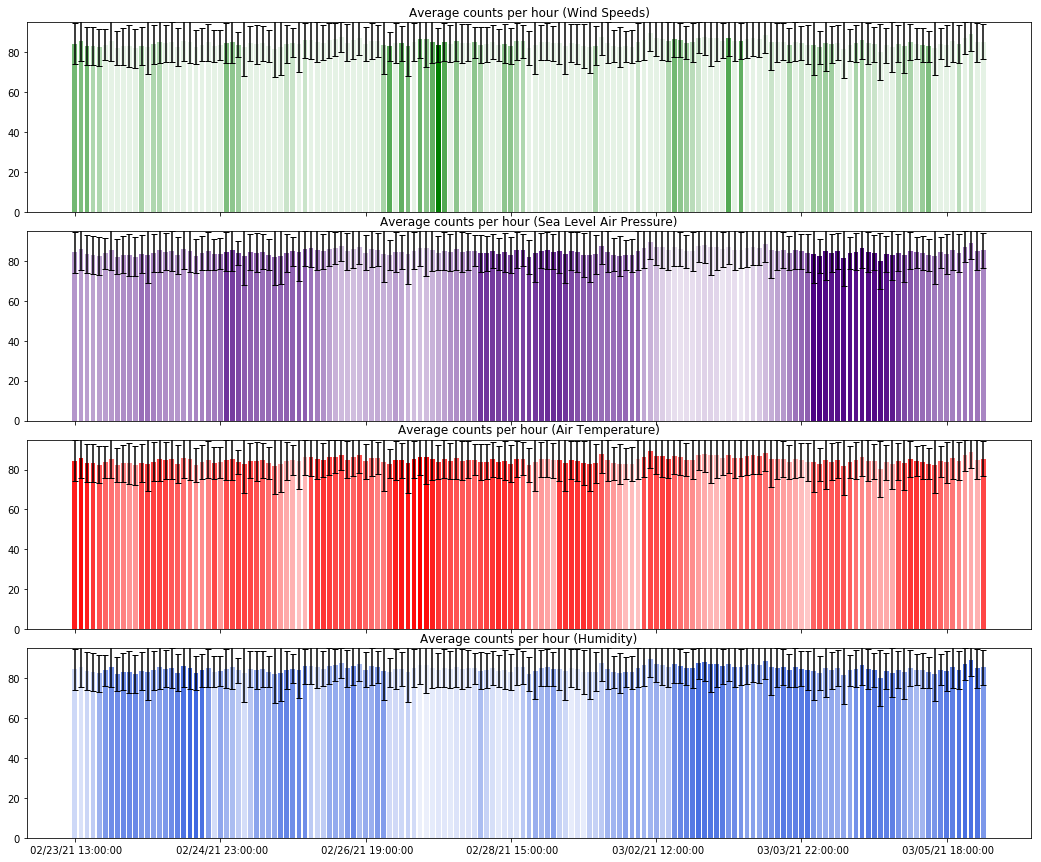

In [8]:

plt.rcParams['figure.figsize'] = [18, 15]

fig1, axs1 = plt.subplots(4, sharex=True, gridspec_kw={'hspace':0.1})
X=[]
AVG = []
xlabels = []
# temp is red, sea level pressure is indigo, humidity is royalblue, wind is green
for i in range(len(tagged)):
    look = tagged[i]
    x = look[0]
    X.append(x)
    mean = look[1]
    AVG.append(mean)
    sigma = look[2]
    axs1[0].bar(x, mean, yerr = sigma, ecolor = "black", capsize=3, color = 'green', alpha = look[3])
    axs1[1].bar(x, mean, yerr = sigma, ecolor = "black", capsize=3, color = "indigo", alpha = look[4])
    axs1[2].bar(x, mean, yerr = sigma, ecolor = "black", capsize=3, color = "red", alpha = look[5])
    axs1[3].bar(x, mean, yerr = sigma, ecolor = "black", capsize=3, color = "royalblue", alpha=look[6])
    if i ==0 or i%24 == 0:
        xlabels.append(x)

avgavg = sum(AVG)/len(AVG)
AVG=[]
for i in X:
    AVG.append(avgavg)
axs1[0].set_title("Average counts per hour (Wind Speeds)")
axs1[0].set_ylim(0, 95)
#axs1[0].plot(X, AVG, color = "gray")
axs1[1].set_title("Average counts per hour (Sea Level Air Pressure)")
axs1[1].set_ylim(0, 95)
#axs1[1].plot(X, AVG, color = "gray")
axs1[2].set_title("Average counts per hour (Air Temperature)")
axs1[2].set_ylim(0, 95)
#axs1[2].plot(X, AVG, color = "gray")
axs1[3].set_title("Average counts per hour (Humidity)")
axs1[3].set_ylim(0, 95)
axs1[3].set_xticks(xlabels)
#axs1[3].plot(X, AVG, color = "gray")

Text(0.5, 1.0, 'Histogram of Avg Events Per Min by Hour')

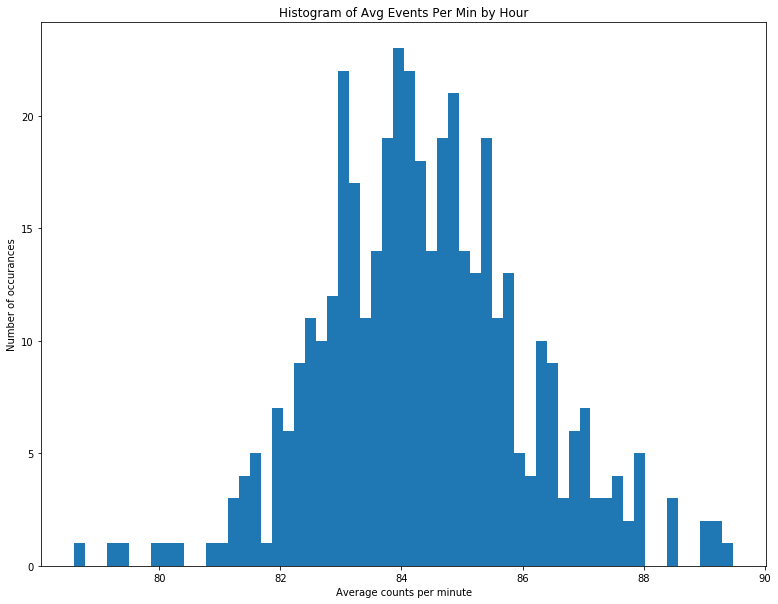

In [9]:
# Make some plots 

plt.rcParams['figure.figsize'] = [13, 10]

x = np.linspace(1, len(date), len(date))

fig2, axs2 = plt.subplots()
axs2.hist(avg, bins = 60)
plt.xlabel("Average counts per minute")
plt.ylabel("Number of occurances")
plt.title("Histogram of Avg Events Per Min by Hour")

# This histogram includes points I do not have proper weather data for

## start coding for more in depth analysis

Prof. Stuart suggested a different method of histogram where I split into four groups based on weather intensity and make four histograms for each average counts per hour distribution. This may be interesting as I can clearly see the raw data does not fit super well to one histogram



[21.1, 22.8, 21.1, 18.9, 16.1, 14.4, 13.3, 12.2, 11.7, 10.0, 10.0, 10.0, 8.9, 7.8, 6.7, nan, 10.6, 16.1, 16.7, 17.2, 17.8, 17.8, 17.8, 17.8, 15.6, 15.0, 13.3, 12.2, 10.0, 10.6, 11.7, 17.2, 9.4, 10.6, 7.8, 7.2, 4.4, 6.7, 5.6, 4.4, 10.0, 15.0, 16.7, 16.7, 17.2, 17.8, 17.8, 17.2, 16.1, 15.6, 13.3, 13.3, 8.9, 7.8, 7.2, 5.6, 6.7, 6.1, 6.1, 4.4, 2.8, 2.2, 4.4, 4.4, 8.9, 15.0, 16.7, 16.7, 18.3, 18.9, 18.3, 17.2, 17.2, 16.1, 14.4, 16.7, 14.4, 13.9, 11.7, 12.2, 16.7, 13.9, 13.3, 8.9, 7.2, 10.0, 11.7, 13.9, 16.1, 17.8, 20.0, 21.1, 21.7, 21.7, 22.8, 23.9, 22.8, 21.1, 18.9, 17.8, 16.7, 16.1, 15.6, 15.6, 14.4, 11.7, 10.0, 9.4, 7.2, 5.6, 4.4, 5.0, 10.0, 15.0, 16.7, 16.7, 17.8, 18.9, 20.0, 19.4, 18.3, 18.9, 14.4, 12.8, 8.9, 9.4, 8.3, 6.1, 6.7, 5.0, 6.1, 6.1, 5.6, 4.4, 3.3, 3.3, 8.9, 16.1, 16.7, 18.3, 18.9, 19.4, 18.9, 19.4, 18.3, 17.2, 15.6, 11.7, 9.4, 7.8, 6.1, 6.1, 5.6, 5.6, 5.6, 4.4, 3.9, 3.3, 2.8, 2.2, nan, 13.9, 15.0, 16.1, 17.2, 16.7, 17.8, 18.3, 14.4, 13.3, 12.2, 10.6, 8.9, 7.8, 6.7, 6.7, 6.1,

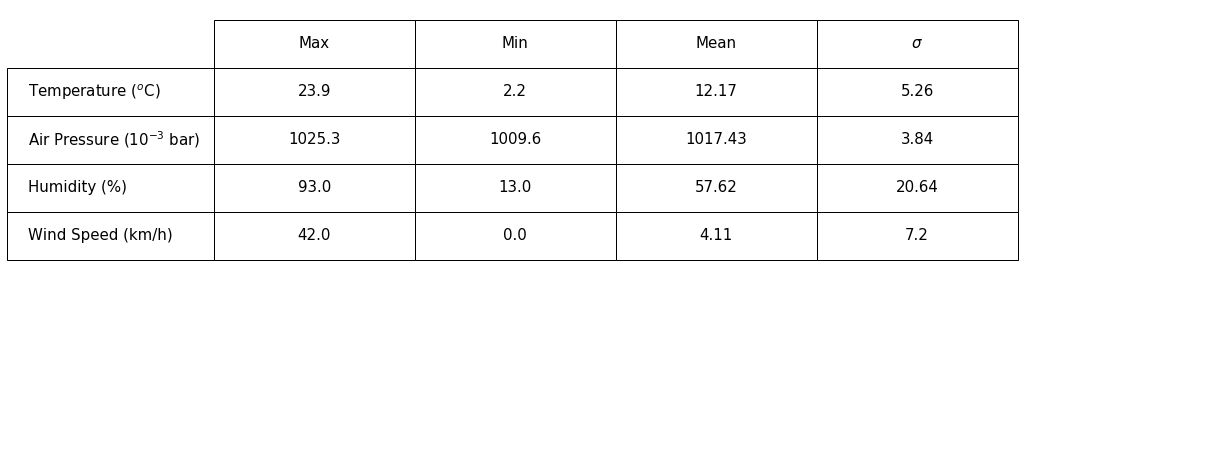

In [59]:
### Make table for weather data 
rows = ["Temperature ($^{o}$C)", "Air Pressure (10$^{-3}$ bar)", "Humidity (%)", "Wind Speed (km/h)"]
columns = ("Max", "Min", "Mean", "$\sigma$")
print(T)

def RemoveNaN(dat):
    back = []
    for i in range(len(dat)):
        if np.isnan(dat[i]) != True:
            back.append(dat[i])
    return back

wdat = [RemoveNaN(T), RemoveNaN(P_sealev), RemoveNaN(humidity)]
plt.rcParams['figure.figsize'] = [18, 8]

def TableData(i):
    high = max(i)
    low = min(i)
    usable = []
    rnge = high - low
    mean = sum(i)/len(i)
    residuals_sq = 0
    for k in i:
        r = k - mean
        residuals_sq = residuals_sq + r**2
    std = (residuals_sq/(len(i)))**(1/2)
    out = [str(high), low, round(mean, 2), round(std, 2)]
    for i in range(len(out)):
        out[i] = "\n" + str(out[i]) + '\n'
    return out

cells = []
for i in wdat:
    cells.append(TableData(i))
mean_wind_abs = sum(wind_abs)/len(wind_abs)
devsq = 0
for i in wind_abs:
    res = mean_wind_abs - i
    devsq = devsq + res**2
std_wind_abs = (devsq/(len(wind_abs)))**(1/2)
cells.append([max(wind_abs), min(wind_abs), round(mean_wind_abs, 2), round(std_wind_abs, 2)])
fig3, axs3 = plt.subplots()
axs3.set_axis_off()
the_table = axs3.table(cellText=cells,
                      rowLabels=rows, cellLoc ='center',  colWidths=[0.2 for x in columns], 
                      colLabels=columns, loc = "upper left")
the_table.scale(1, 4)
the_table.set_fontsize(15)

/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


246


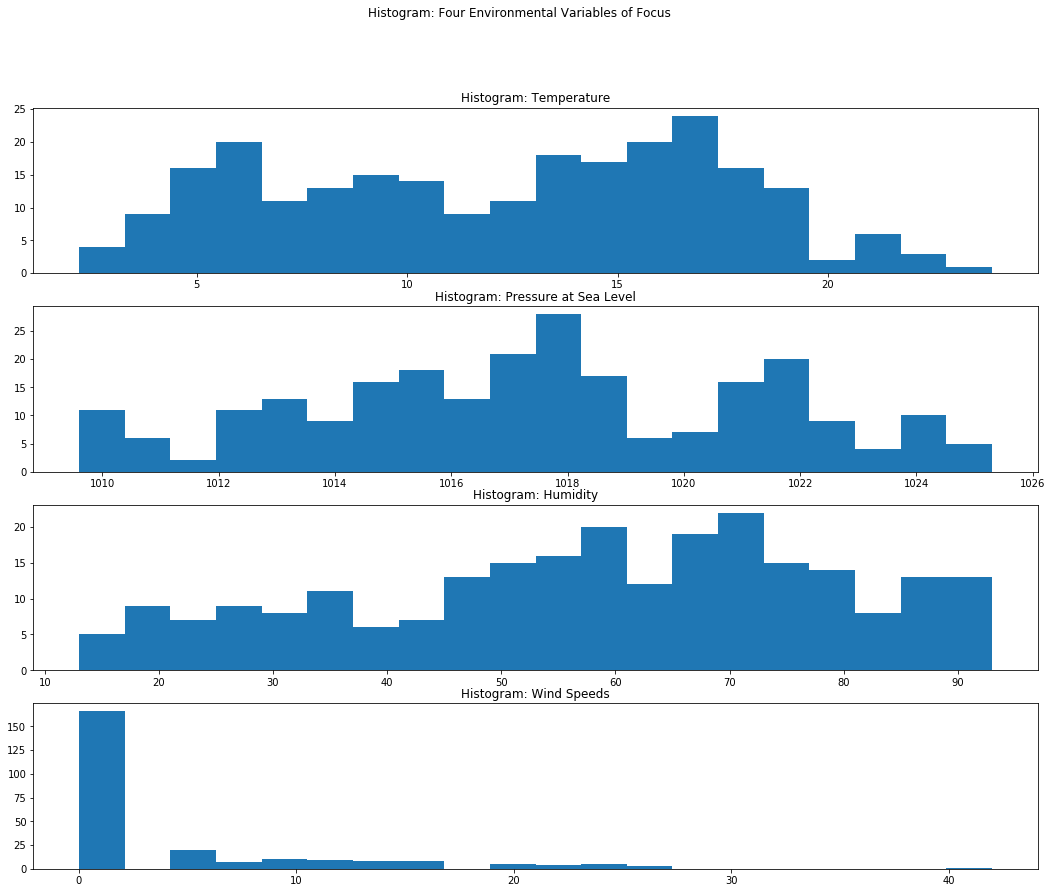

In [11]:
plt.rcParams['figure.figsize'] = [18, 14]


fig4, axs4 = plt.subplots(4, sharex=False, gridspec_kw={'hspace':0.2})
fig4.suptitle("Histogram: Four Environmental Variables of Focus")
axs4[1].hist(P_sealev, bins = 20)
axs4[1].set_title("Histogram: Pressure at Sea Level")
axs4[0].hist(T, bins = 20)
axs4[0].set_title("Histogram: Temperature")
axs4[2].hist(humidity, bins = 20)
axs4[2].set_title("Histogram: Humidity")
axs4[3].hist(wind_abs, bins =20)
axs4[3].set_title("Histogram: Wind Speeds")
print(len(humidity))

In [16]:
### Break up weather and tagged data 

# coupled is array of arrays : [measured date, collect date, average IPM, std IPM, wind, sea level pressure, temperature, humidity]
## make bins:
foursplit_histogram = [["T"] ,["P"], ["H"], ["W"]] # data frame for weather params
n = 4 # split data into these many histograms
for i in range(len(cells)):
    now = cells[i]
    r = float(now[0]) - float(now[1]) # range of weather parameter
    size = r/n
    for j in range(1, 1+n):
        rdat = float(now[1]) +  size*j
        foursplit_histogram[i].append(rdat)
    print(float(now[0]) == foursplit_histogram[i][4]) # check that range spans min to max
print(foursplit_histogram)
    
# split up data:

working = [RemoveNaN(T), RemoveNaN(P_sealev), RemoveNaN(humidity), wind_abs]


def Generate4SplitData(tags, tagged_data, para_index):
    stop1 = float(tags[1])
    stop2 = float(tags[2])
    stop3 = float(tags[3])
    stop4 = float(tags[4])
    print(stop1, stop2, stop3, stop4)
    h1, h2, h3, h4 = [], [], [], []
    std_h1, std_h2, std_h3, std_h4 = [], [], [], []
    for i in tagged_data:
        test = float(i[para_index])
        if test <= stop1: 
            h1.append(i[2])
            std_h1.append(i[3])
        else:
            if test <= stop2:
                h2.append(i[2])
                std_h2.append(i[3])
            else:
                if test<=stop3:
                    h3.append(i[2])
                    std_h3.append(i[3])
                else:
                    if test <= stop4:
                        h4.append(i[2])
                        std_h4.append(i[3])
                    else:
                        print(i)
    print((len(h1)+ len(h2)+ len(h3) + len(h4)) == len(tagged_data)) #check all vals are accounted for 
    return [h1, h2, h3, h4]



THIST = Generate4SplitData(foursplit_histogram[0], coupled, 6)
PHIST = Generate4SplitData(foursplit_histogram[1], coupled, 5)
HHIST = Generate4SplitData(foursplit_histogram[2], coupled, 7)
WHIST = Generate4SplitData(foursplit_histogram[3], coupled, 4)

print(HHIST)
histograms = [THIST, PHIST, HHIST, WHIST] # four histograms of four panels each for [temp, pressure, humidity, wind_abs]


True
True
True
True
[['T', 7.625, 13.05, 18.474999999999998, 23.9], ['P', 1013.525, 1017.45, 1021.375, 1025.3], ['H', 33.0, 53.0, 73.0, 93.0], ['W', 10.5, 21.0, 31.5, 42.0]]
7.625 13.05 18.474999999999998 23.9
True
1013.525 1017.45 1021.375 1025.3
True
33.0 53.0 73.0 93.0
True
10.5 21.0 31.5 42.0
True
[[84.35, 85.8, 83.41666666666667, 83.25, 82.59016393442623, 85.33333333333333, 82.95, 84.53333333333333, 84.53333333333333, 83.29508196721312, 85.11666666666666, 86.46666666666667, 86.49180327868852, 85.26666666666667, 83.86666666666666, 85.05, 84.31666666666666, 85.8, 84.5, 84.88333333333334, 85.0, 83.93333333333334, 85.1, 83.63333333333334, 84.3, 83.0, 85.45, 84.76666666666667, 83.36065573770492, 84.91666666666667, 84.4, 83.2, 82.90163934426229, 83.23333333333333], [83.06666666666666, 82.46666666666667, 84.71666666666667, 85.41666666666667, 83.86666666666666, 84.5, 84.58333333333333, 83.21666666666667, 86.25, 84.8, 87.5, 87.21666666666667, 84.13333333333334, 85.83333333333333, 83.75, 85

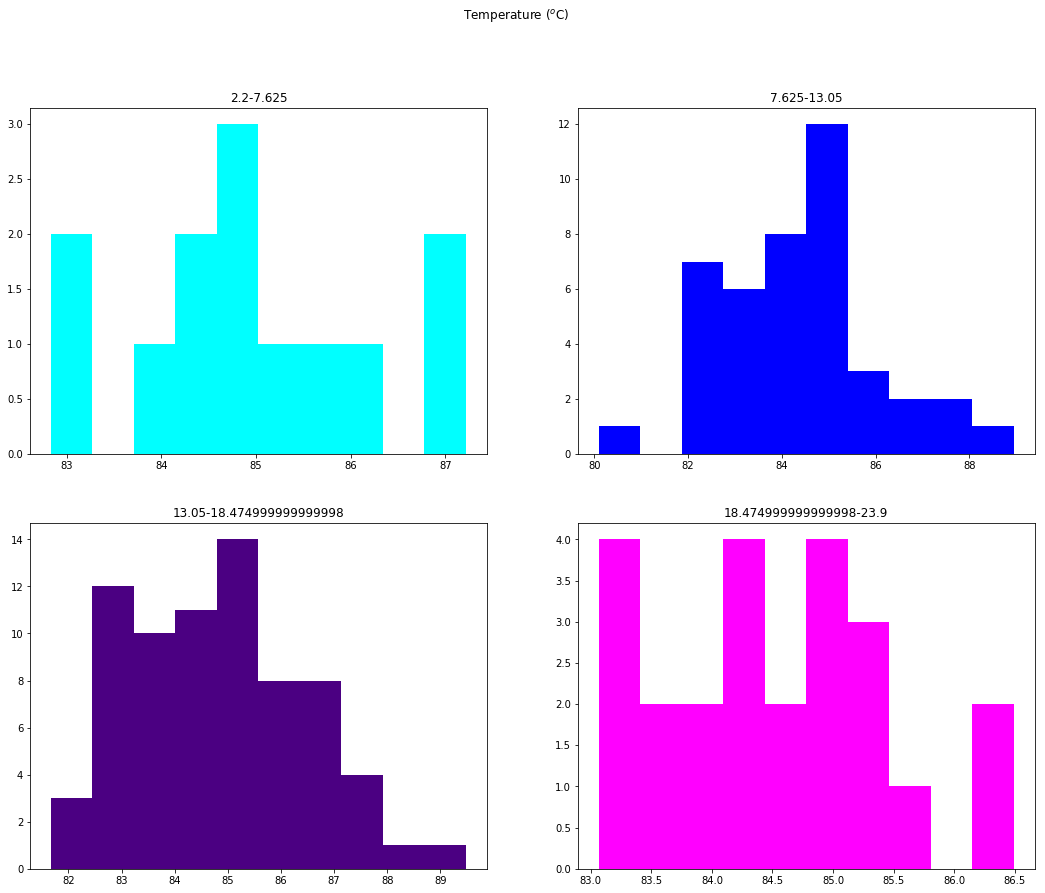

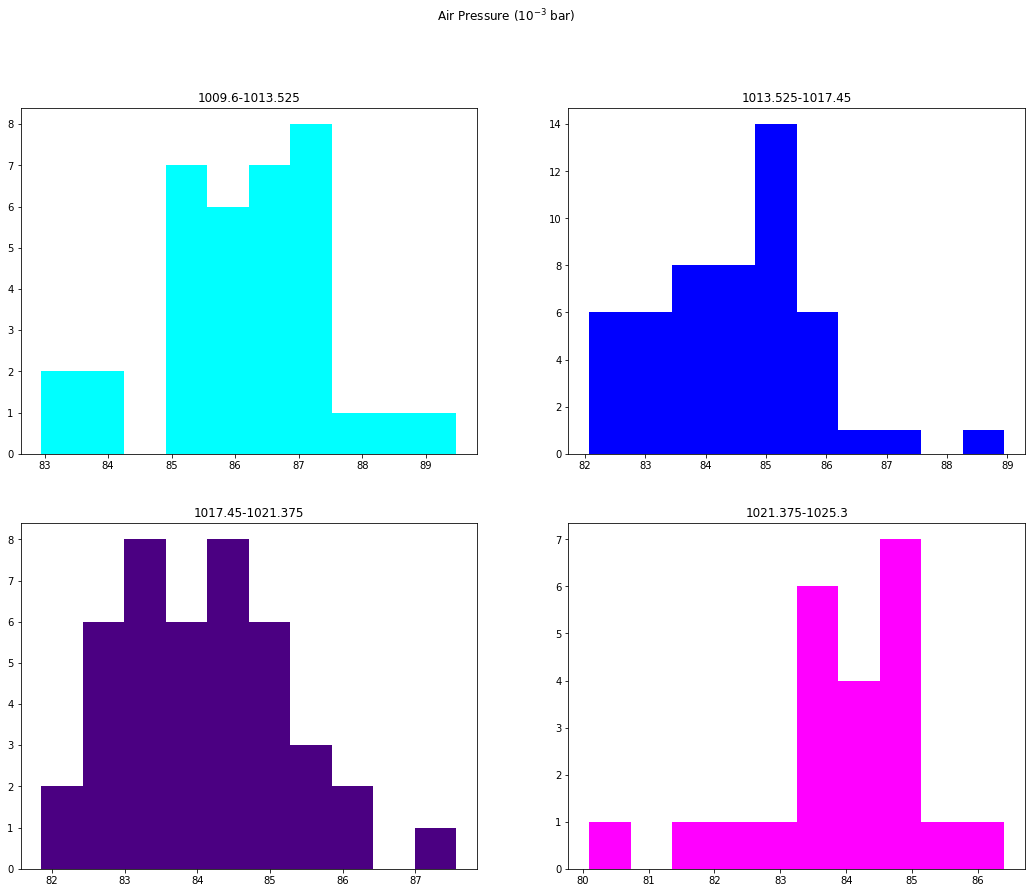

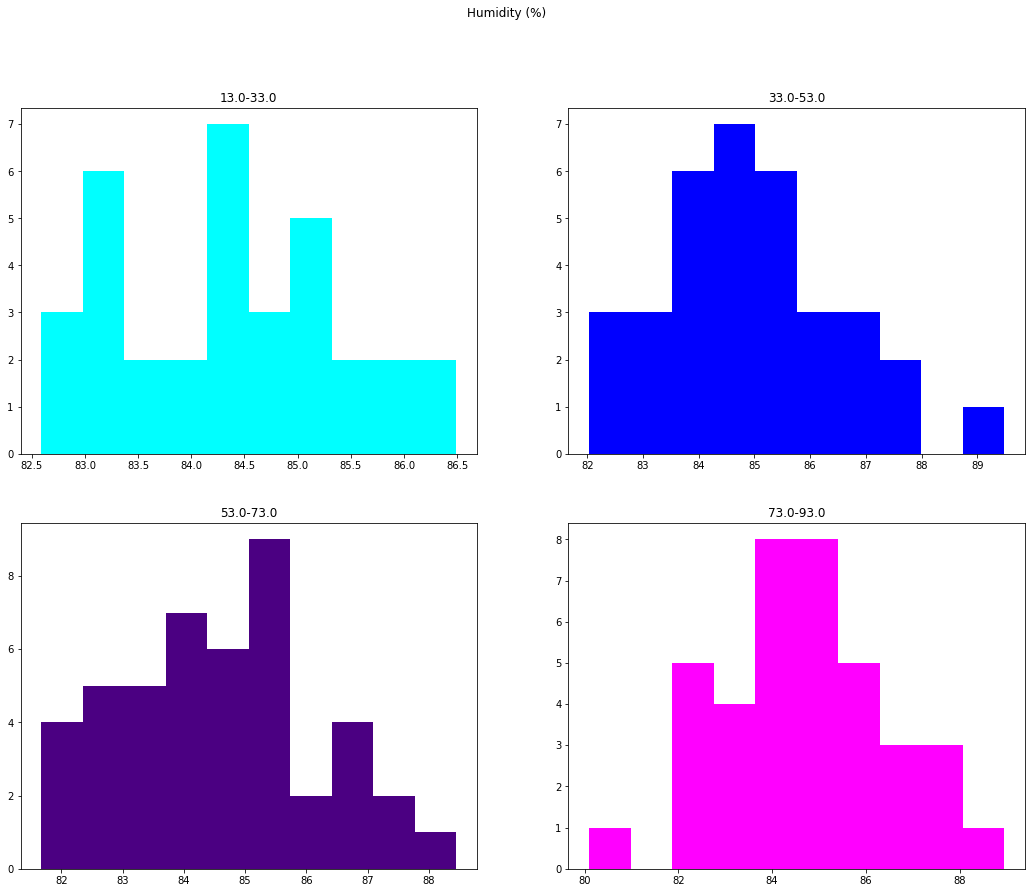

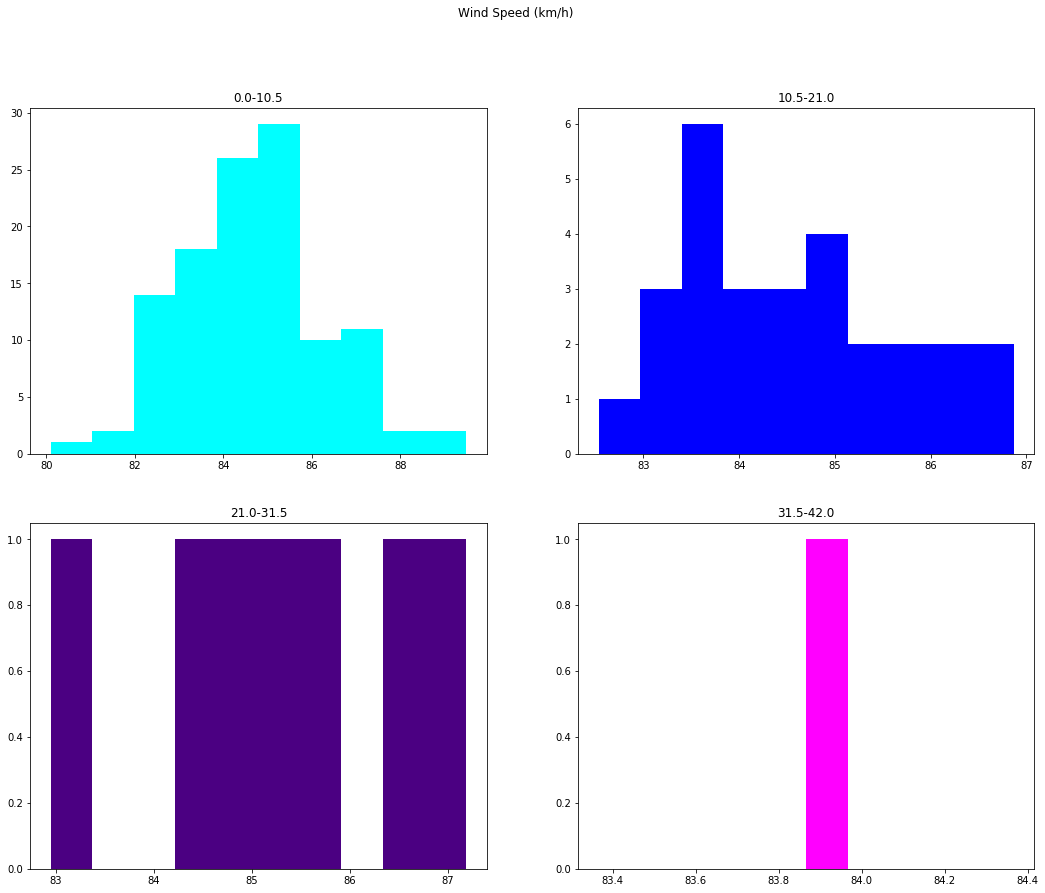

In [17]:
## Air pressure figure 

fig5, axs5 = plt.subplots(2,2) # temp 
fig6, axs6 = plt.subplots(2,2) # pressure
fig7, axs7 = plt.subplots(2,2) # humidity
fig8, axs8 = plt.subplots(2,2) # wind speeds
mins = [min(RemoveNaN(T)), min(RemoveNaN(P_sealev)), min(RemoveNaN(humidity)), min(wind_abs)]
axs = [axs5, axs6, axs7, axs8]
figs = [fig5, fig6, fig7, fig8]

for i in range(4):
    use = histograms[i]
    subtags = foursplit_histogram[i]
    axes = axs[i]
    figs[i].suptitle(rows[i])
    axes[0,0].hist(use[0], bins = 10, color = "cyan")
    axes[0,0].set_title(str(mins[i]) + "-" + str(subtags[1]))
    axes[0,1].hist(use[1] , bins = 10, color = "blue")
    axes[0,1].set_title(str(subtags[1]) + "-" + str(subtags[2]))
    axes[1,0].hist(use[2] , bins = 10, color = "indigo")
    axes[1,0].set_title(str(subtags[2]) + "-" + str(subtags[3]))
    axes[1,1].hist(use[3] , bins = 10, color = "magenta")
    axes[1,1].set_title(str(subtags[3]) + "-" + str(subtags[4]))




Text(0.5, 0.98, 'Histogram of Incidents per Minute Averaged over 1hr, Color coded by Weather intensity\nIntensity (lowest to highest quarter): cyan, blue, indigo, magenta')

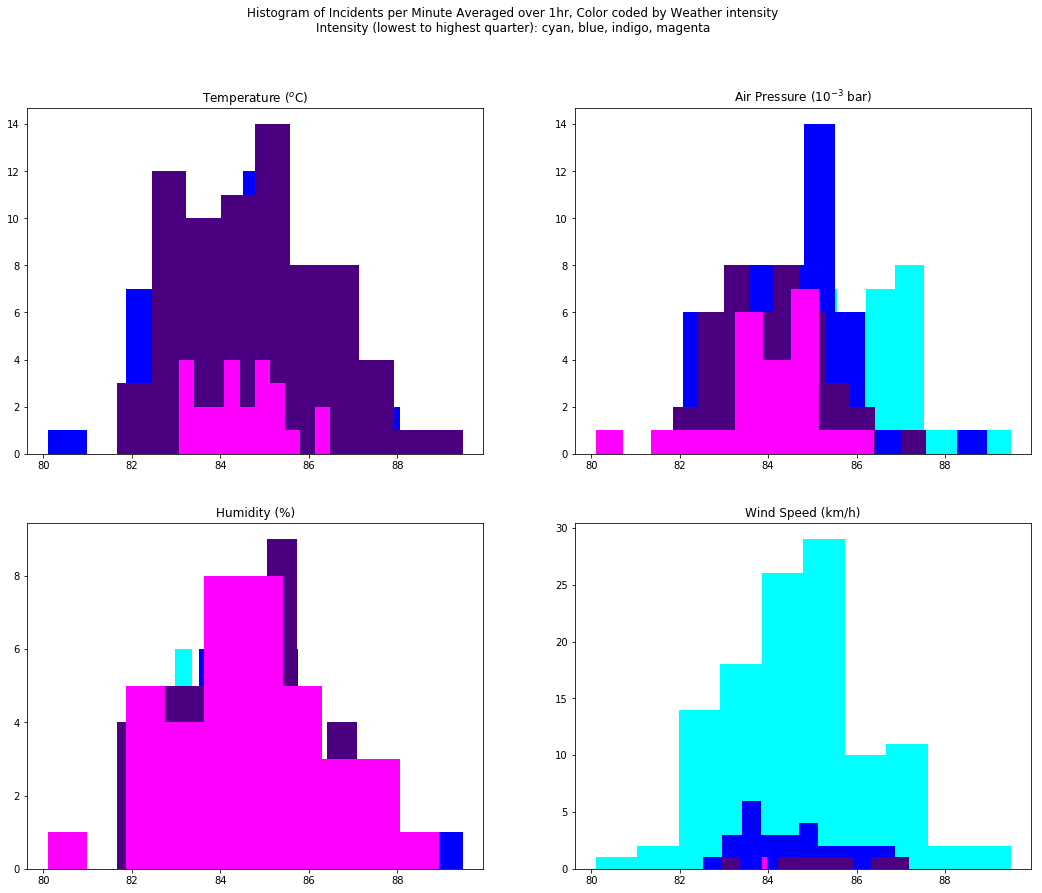

In [18]:
fig9, axs9 = plt.subplots(2,2)
axs = [axs9[0,0], axs9[0, 1], axs9[1, 0], axs9[1, 1]]

for i in range(4):
    use = histograms[i]
    subtags = foursplit_histogram[i]
    axes = axs[i]
    axes.set_title(rows[i])
    axes.hist(use[0], bins = 10, color = "cyan")
    axes.hist(use[1] , bins = 10, color = "blue")
    axes.hist(use[2] , bins = 10, color = "indigo")
    axes.hist(use[3] , bins = 10, color = "magenta")

fig9.suptitle("Histogram of Incidents per Minute Averaged over 1hr, Color coded by Weather intensity\nIntensity (lowest to highest quarter): cyan, blue, indigo, magenta")


In [19]:

def Mean_StdDev(data):
    mean = sum(data)/len(data)
    resSq = 0
    for i in data:
        res = i-mean
        resSq = resSq + res**2
    std = (resSq/len(data))**(1/2)
    return mean, std

def Gaussian(x, mean, std, weight): 
    coeff = 1/(std*(2*(355/113))**(1/2))
    out = np.zeros(len(x))
    for i in range(len(x)):
        power = (-1/2)*((x[i]-mean)/std)**2
        out[i] = weight*coeff*math.exp(power)
    return out
    

84.67399124235511 1.5480607136871567
151 246 151


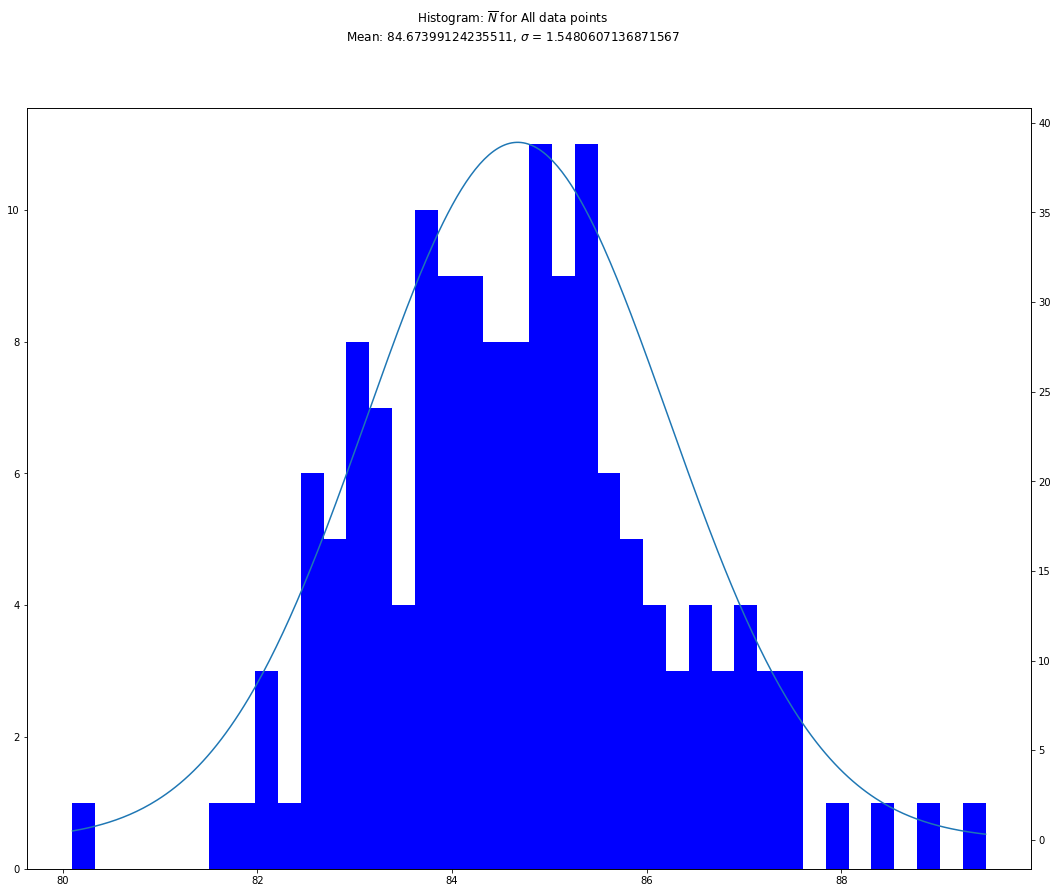

In [20]:
fig10, axs10 = plt.subplots()

LinkedAll = []

for i in range(4):
    for k in histograms[0][i]:
            LinkedAll.append(k)
axs10.hist(LinkedAll, bins = 40, color = "blue")

axs10b = axs10.twinx()
mean_LinkedAll, std_LinkedAll = Mean_StdDev(LinkedAll)
x_all = np.linspace(min(LinkedAll), max(LinkedAll), 400)


gauss_all = Gaussian(x_all, mean_LinkedAll, std_LinkedAll, len(LinkedAll))
axs10b.plot(x_all, gauss_all)
#axs10b.set_ylim(0, 0.3)
print(mean_LinkedAll, std_LinkedAll)
fig10.suptitle("Histogram: $\overline{N}$ for All data points\nMean: "+ str(mean_LinkedAll)+ ", $\sigma$ = "+ str(std_LinkedAll))
print(len(LinkedAll), len(humidity), len(coupled))

## [RN] 3:02 

took a break. The plots where all four data chunks are stacked does not look good. i will fit gaussians to figs 5-8 and compare them to eachother and gaussian for total.I will try using guassins in both four weather figures i tried for cleaner representatins.  



13
42
72
24
35
51
42
23
34
34
45
38
115
28
7
1


/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


ValueError: Axis limits cannot be NaN or Inf

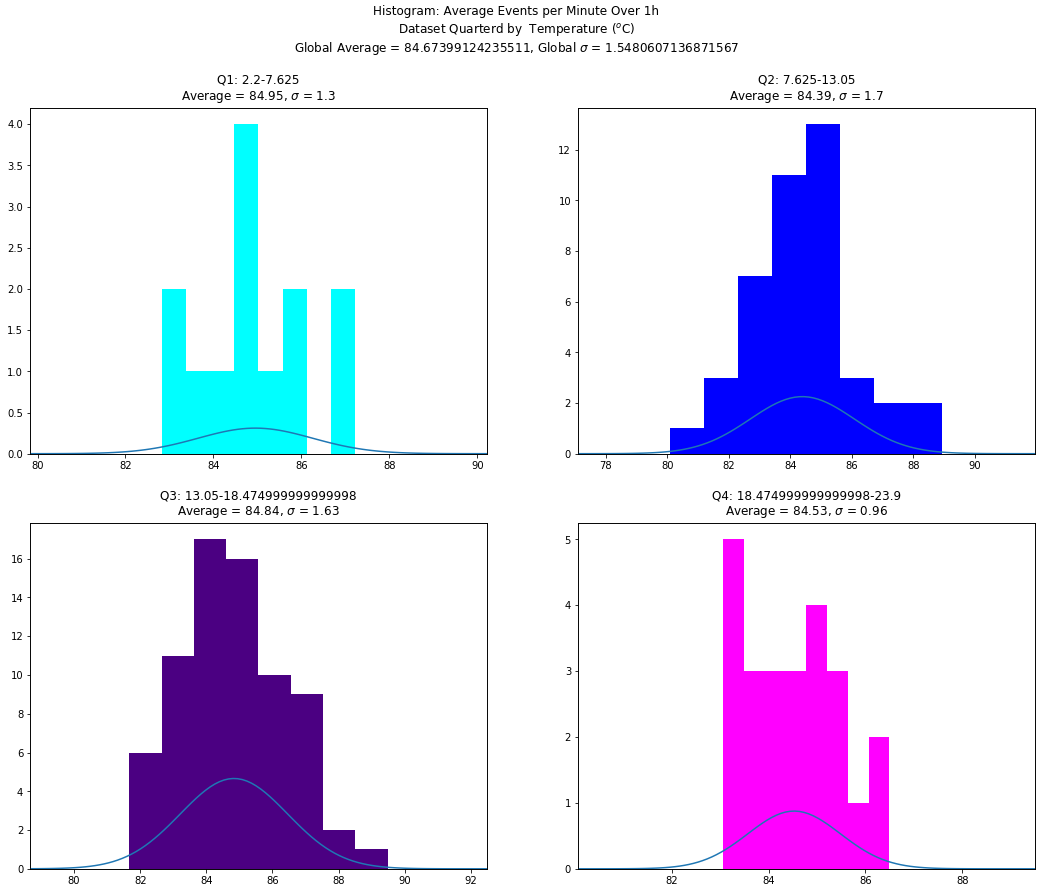

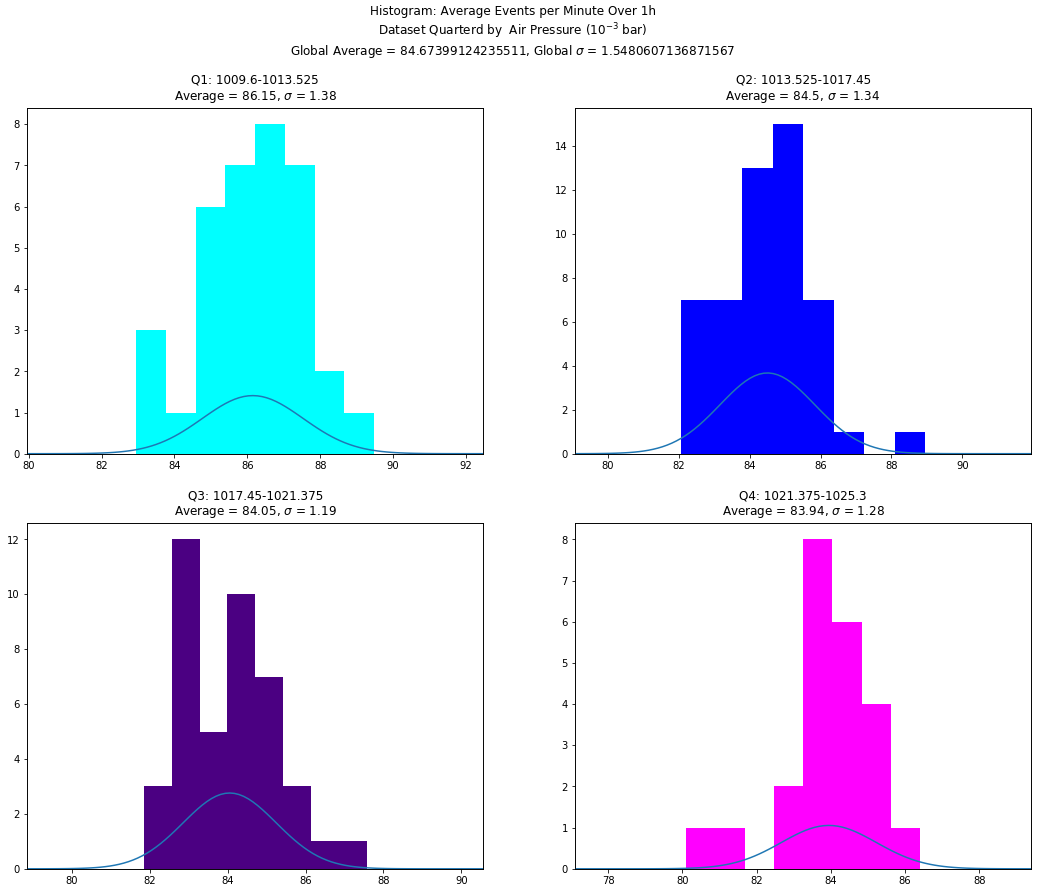

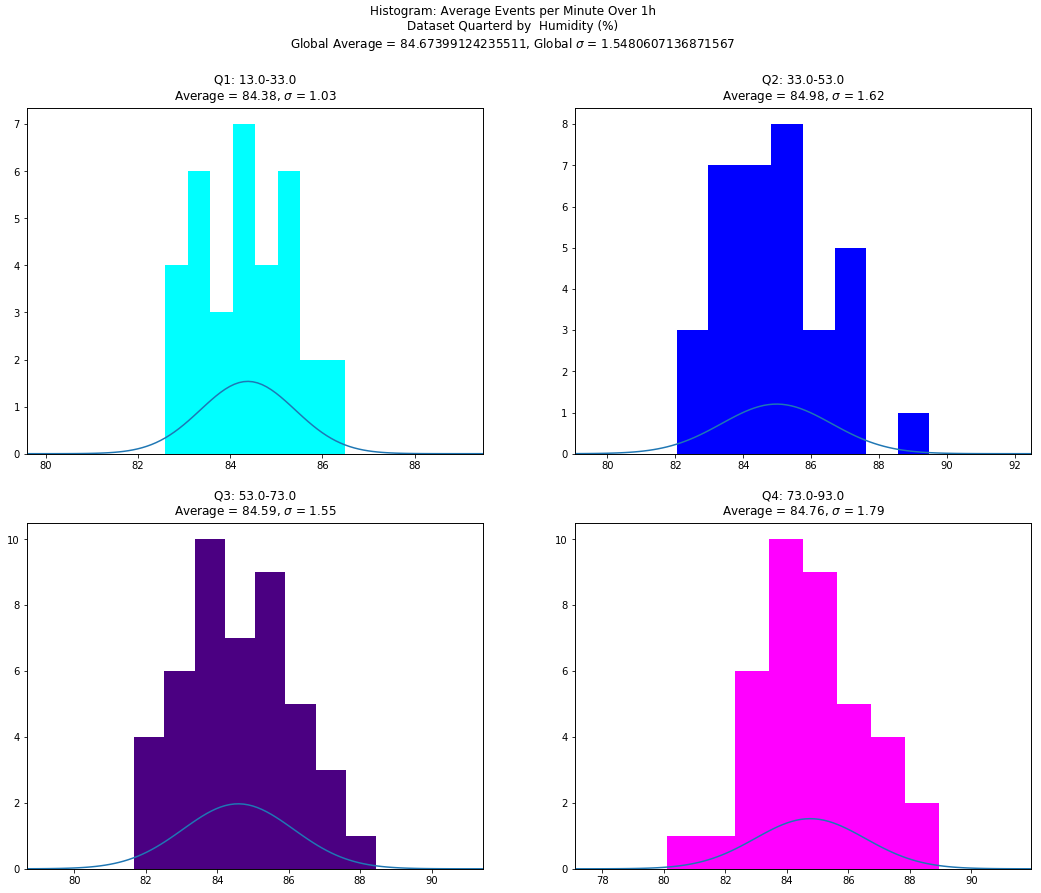

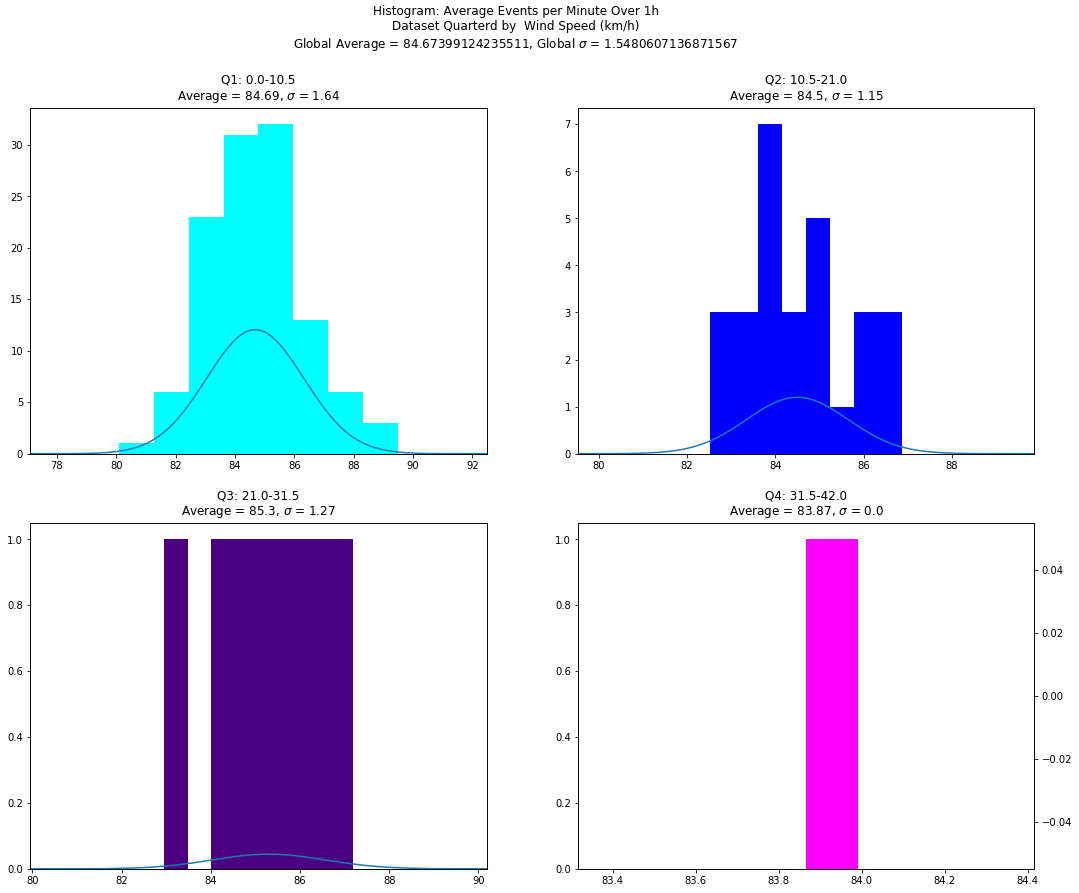

In [21]:
### Gaussian of 4x(4x4)plots 

## Air pressure figure 

fig11, axs11 = plt.subplots(2,2) # temp 
fig12, axs12 = plt.subplots(2,2) # pressure
fig13, axs13 = plt.subplots(2,2) # humidity
fig14, axs14 = plt.subplots(2,2) # wind speeds
mins = [min(RemoveNaN(T)), min(RemoveNaN(P_sealev)), min(RemoveNaN(humidity)), min(wind_abs)]
axs = [axs11, axs12, axs13, axs14]
figs = [fig11, fig12, fig13, fig14]
colors = ["cyan", "blue", "indigo", "magenta"]

for i in range(4):
    use = histograms[i]
    subtags = foursplit_histogram[i]
    axes = axs[i]
    panels = [axes[0,0], axes[0, 1], axes[1, 0], axes[1, 1]]
    figs[i].suptitle("Histogram: Average Events per Minute Over 1h\nDataset Quarterd by  " + rows[i] + "\nGlobal Average = "+ str(mean_LinkedAll) + ", Global $\sigma$ = "+str(std_LinkedAll))
    for j in range(4): 
        axsb = panels[j].twinx()
        avg, std = Mean_StdDev(use[j])
        x = np.linspace(min(use[j])-3, max(use[j])+3, 100)
        gauss = Gaussian(x, avg, std, len(use[j]))
        print(len(use[j]))
        panels[j].hist(use[j], bins = 8, color = colors[j])
        if j == 0:
            panels[j].set_title("Q"+str(j+1)+": " + str(mins[i]) + "-" + str(subtags[1])+"\nAverage = " + str(round(avg, 2)) + ", $\sigma$ = " + str(round(std, 2)))
        else:
            panels[j].set_title("Q"+str(j+1)+": " + str(subtags[j]) + "-" + str(subtags[j+1])+"\nAverage = " + str(round(avg, 2)) + ", $\sigma$ = " + str(round(std, 2)))
        axsb.plot(x, gauss)
        axsb.set_ylim(0, max(gauss)+50)
        axsb.set_yticks([])
        panels[j].set_xlim(min(use[j])-3, max(use[j])+3)

        




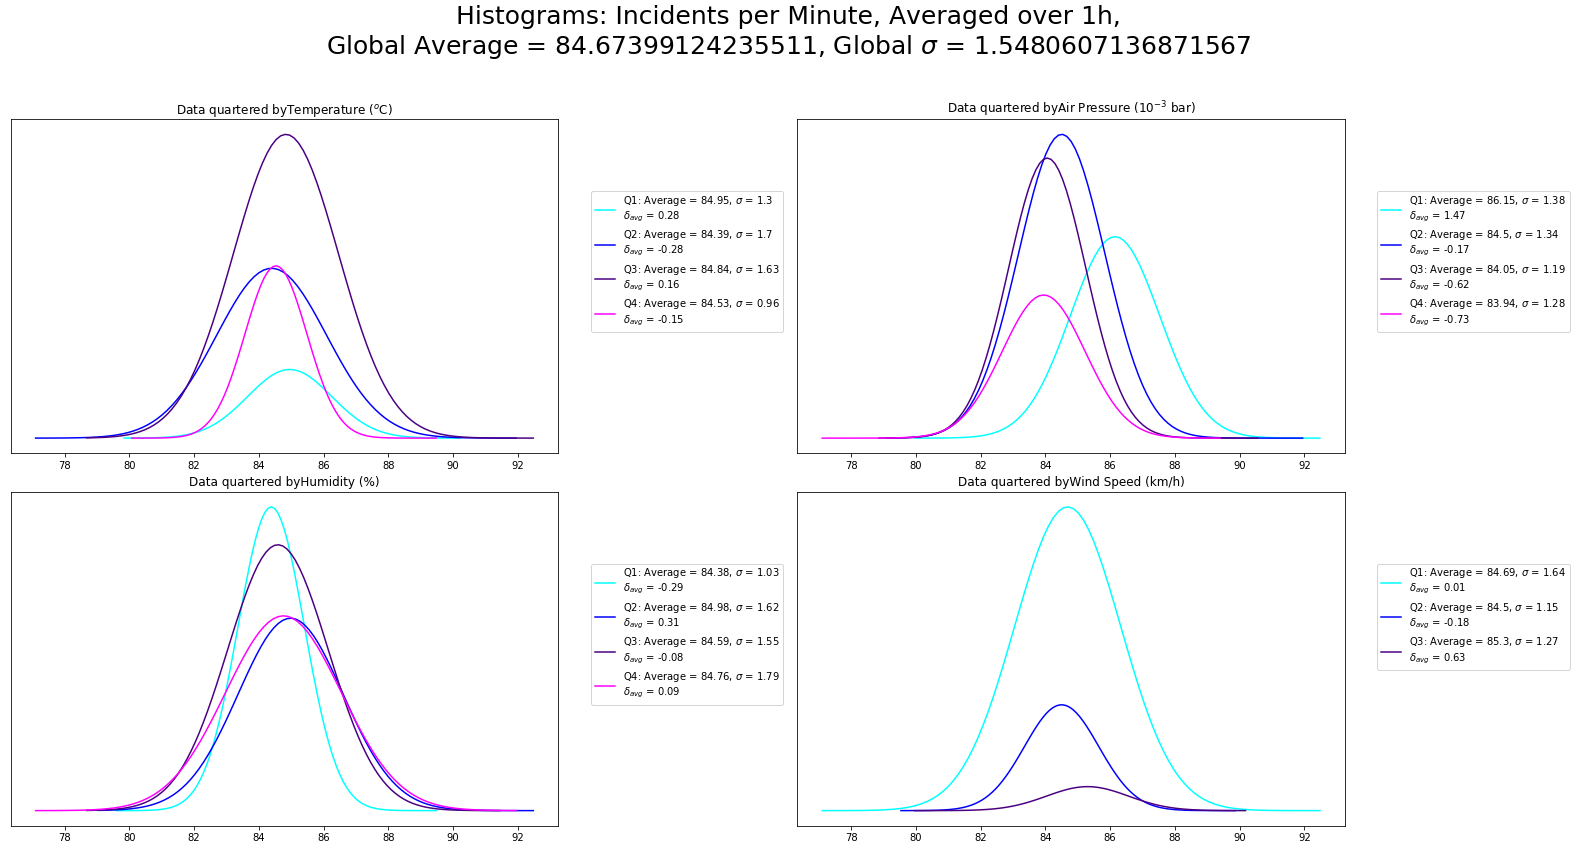

In [22]:
plt.rcParams['figure.figsize'] = [22, 12]
fig15, axs15 = plt.subplots(2,2)
axs = [axs15[0,0], axs15[0, 1], axs15[1, 0], axs15[1, 1]]
fig15.suptitle("Histograms: Incidents per Minute, Averaged over 1h,\nGlobal Average = "+ str(mean_LinkedAll) + ", Global $\sigma$ = "+str(std_LinkedAll), fontsize = 25)
fig15.tight_layout(rect=[0, 0.03, 1, 0.9])

for i in range(4):
    use = histograms[i]
    subtags = foursplit_histogram[i]
    axes = axs[i]
    axes.set_title("Data quartered by"+ rows[i])
    for j in range(4):
        if len(use[j]) > 4:
            avg, std = Mean_StdDev(use[j])
            x = np.linspace(min(use[j])-3, max(use[j])+3, 100)
            gauss = Gaussian(x, avg, std, len(use[j]))
            axes.plot(x, gauss, color = colors[j], label = "Q"+str(j+1)+": Average = " + str(round(avg, 2)) + ", $\sigma$ = " + str(round(std, 2)) + "\n$\delta_{avg}$ = " + str(round(-mean_LinkedAll + avg, 2)))
    #axes.plot(x_all, gauss_all, color = "black", label = "Global Data")
    axes.set_yticks([])
    axes.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
        

### [RN] 4:03

This plot is a nice figure to represent the variation in average counts per minute observed under different weather conditions. However it is a bit deceptive becuase the bins are different sizes. I need to tweak it a bit more. Maybe I should use a weighted average. 

Taking a break to go grocery shopping. 

### [RN] 8:10 pm 

I want to plot humidity v. counts per min and air pressure to see if there are any trends

In [23]:
from scipy.optimize import curve_fit

[-5.79303306e-03  8.48603973e+01]
[-2.57557167e-01  3.46679041e+02]
[1.32774424e-02 8.40488799e+01]
[5.48366711e-02 8.41445636e+01]


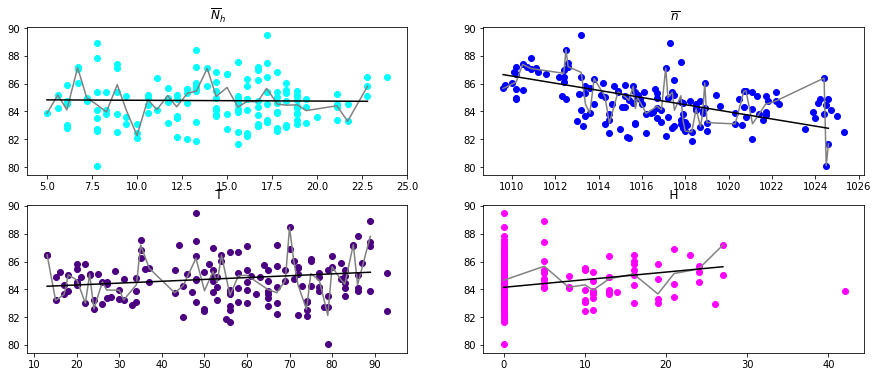

In [36]:
def GenerateScatter(coupled, para_index, mplib, c):
    fig, ax = mplib[0], mplib[1]
    op = []
    for i in coupled:
        point = [float(i[para_index]), float(i[2])]
        ax.scatter(point[0],  point[1], color = c)
        op.append(point)
    return(op)

fig16, axs16 = plt.subplots(2,2) 

def ExpFit(x, a, b, c):
    return a * np.exp(-b * x) + c

figs = [[fig16, axs16[0, 0]], [fig16, axs16[0, 1]], [fig16, axs16[1, 0]], [fig16, axs16[1, 1]]]
colors = ["cyan", "blue", "indigo", "magenta"]
param_index = [6, 5, 7, 4]
ordered_pairs = [[], [], [], []]
distilled_pairs = [[], [], [], []]
distilled_std = [[], [], [], []]
smoothed_pairs = [[], [], [], []]
smoothed_std = [[], [], [], []]
for i in range(4):
    op = GenerateScatter(coupled, param_index[i], figs[i], colors[i]) # temperature plot
    figs[i][1].set_title(rows[i])
    op.sort(key=lambda x: x[0])
    ordered_pairs[i] = op
    running_total = [op[0][1]]
    for j in range(1, len(op)):
        if op[j][0] == op[j-1][0]:
            running_total.append(op[j][1])
        else:
            try:
                mean, std = Mean_StdDev(running_total)
                dp = [op[j-1][0], mean]
                distilled_pairs[i].append(dp)
                running_total = []
            except ZeroDivisionError:
                pass
    x, y = [], []
    for k in distilled_pairs[i]:
        x.append(k[0])
        y.append(k[1])
    figs[i][1].plot(x, y, color = "gray")
    p = np.polyfit(x, y, 1)
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = np.zeros(len(x_fit))
    for h in range(len(x_fit)):
        y_fit[h] = p[1]  + x_fit[h]*p[0] 
    print(p)
    #y = ExpFit(x_fit, y[0], 0.05, 1)
    #np.random.seed(1729)
   # y_noise = 0.2 * np.random.normal(size=x_fit.size)
    #ydata = y + y_noise
    #popt, pcov = curve_fit(ExpFit, x_fit, y)
    figs[i][1].plot(x_fit, y_fit, color = "black")
        

### [RN] 11:14 AM

We were expecting to find stronger correlations. It looks like this data set is simply not large enought to give conclusive results. However, I think we can use error analysis to prove that the average counts per minute is correlated to humidity, air pressure, and wind. 

I still think humidity is the best thing to focus on, as temperature shows little correation by visual examination, wind speed has a lot of 0 data points, and air pressure has a low range in measured values. 

I will duplicate the plot above and add error bars.  

361.87028796249996 398.3609182286633
R squared is:  -0.005188318915297474
The standard deviation of the data set from the fit is: 0.12630578206122692
The slope of the line of best fit for  Temperature ($^{o}$C)  is statistically significant False
The fit equation is, y =  84.86039730129409   + x^ -0.005793033060643875 and the standard deviation of measured data from predicted by fit is 0.12630578206122692 


361.87028796250024 398.3609182286633
R squared is:  0.17855407022662895
The standard deviation of the data set from the fit is: 0.11417972869487973
The slope of the line of best fit for  Air Pressure (10$^{-3}$ bar)  is statistically significant True
The fit equation is, y =  346.6790413750864   + x^ -0.2575571670797353 and the standard deviation of measured data from predicted by fit is 0.11417972869487973 


361.87028796250013 398.3609182286633
R squared is:  -0.013271031771002528
The standard deviation of the data set from the fit is: 0.12681257731033901
The slope of the line of

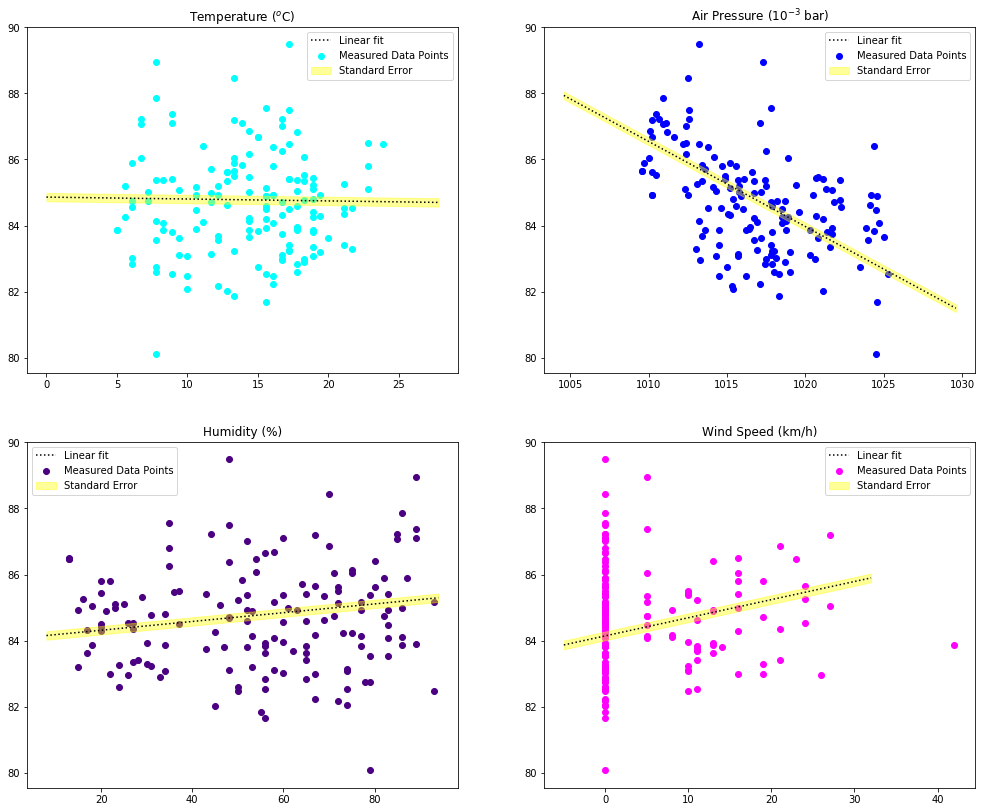

In [61]:
fig17, axs17 = plt.subplots(2,2) # temp 
plt.rcParams['figure.figsize'] = [17, 14]
figs = [[fig17, axs17[0, 0]], [fig17, axs17[0, 1]], [fig17, axs17[1, 0]], [fig17, axs17[1, 1]]]
colors = ["cyan", "blue", "indigo", "magenta"]
param_index = [6, 5, 7, 4]
ordered_pairs = [[], [], [], []]
distilled_pairs = [[], [], [], []]
distilled_std = [[], [], [], []]
smoothed_pairs = [[], [], [], []]
smoothed_std = [[], [], [], []]
def isSignificant(dat): 
    count = 0
    for i in dat:
        if i == False:
            count = count + 1
    if count == 0:
        return True
    else:
        return False
for i in range(4):
    op = GenerateScatter(coupled, param_index[i], figs[i], colors[i]) # temperature plot
    figs[i][1].set_title(rows[i])
    ybar = []
    op.sort(key=lambda x: x[0])
    for j in op:
        ybar.append(j[1])
    Y = sum(ybar)/len(ybar)
    ordered_pairs[i] = op
    running_total = [op[0][1]]
    for j in range(1, len(op)):
        if op[j][0] == op[j-1][0]:
            running_total.append(op[j][1])
        else:
            try:
                mean, std = Mean_StdDev(running_total)
                dp = [op[j-1][0], mean]
                distilled_pairs[i].append(dp)
                running_total = []
            except ZeroDivisionError:
                pass
    x, y = [], []
    for k in distilled_pairs[i]:
        x.append(k[0])
        y.append(k[1])
    figs[i][1].scatter(op[0][0], op[0][1], color=colors[i], label = "Measured Data Points")
    p = np.polyfit(x, y, 1)
    x_fit = np.linspace(x[0]-5, x[len(x)-1]+5, 100)
    y_fit = np.zeros(len(x_fit))
    for h in range(len(x_fit)):
        y_fit[h] = p[1]  + x_fit[h]*p[0] 
    #print(p)
    ## Calculate standard deviation from fit
    R = 0
    SS_total = 0
    for j in range(len(op)):
        measured = op[j][1]
        predicted =  p[1]  + op[j][0]*p[0]
        SS_total = (measured-Y)**2 + SS_total
        res_sq = (measured-predicted)**2
        R = R + res_sq
    std_MeasuredFromFit = (R/len(op))**(1/2)*(1/(len(op)**(1/2)))
    Rsqr = 1-(R/SS_total)
    print(SS_total, SS_res)
    print("R squared is: ", Rsqr)
    figs[i][1].plot(x_fit, y_fit, color = "black", linestyle="dotted", label = "Linear fit")
    y_upper, y_lower = [], []
    for j in y_fit:
        y_upper.append(j + std_MeasuredFromFit)
        y_lower.append(j - std_MeasuredFromFit)
    print("The standard deviation of the data set from the fit is:", std_MeasuredFromFit)
    figs[i][1].fill_between(x_fit, y_lower, y_upper, color = 'yellow', alpha = 0.4, label = "Standard Error")
    #print("The last point on the line is ", y_fit[len(y_fit-1], ".")
    #print("The first point on the line is ", y_fit[0], ".")
    figs[i][1].legend()
    significance = [abs(y_fit[len(y_fit)-1] - y_fit[0]) > std_MeasuredFromFit, abs(y_upper[len(y_upper)-1] - y_fit[0]) > std_MeasuredFromFit, abs(y_lower[len(y_lower)-1] - y_fit[0]) > std_MeasuredFromFit, abs(y_upper[len(y_upper)-1] - y_lower[0]) > std_MeasuredFromFit, abs(y_lower[len(y_lower)-1] - y_upper[0]) > std_MeasuredFromFit]
    #print("The first and last points on the line for the linear ", rows[i], "plot are NOT within one standard deviation of eachtoher is:", abs(y_fit[len(y_fit)-1] - y_fit[0]) > std_MeasuredFromFit)
    #print("The error for upper limit on the first point and last point on the line for the linear ", rows[i], "plot are NOT within one standard deviation of eachtoher is:", abs(y_upper[len(y_upper)-1] - y_fit[0]) > std_MeasuredFromFit)
    #print("The error for lower limit on the first point and last point on the line for the linear ", rows[i], "plot are NOT within one standard deviation of eachtoher is:", abs(y_lower[len(y_lower)-1] - y_fit[0]) > std_MeasuredFromFit)
    #print("The error for upper limit on the first point and lower limit on the last point on the line for the linear ", rows[i], "plot are NOT within one standard deviation of eachtoher is:", abs(y_upper[len(y_upper)-1] - y_lower[0]) > std_MeasuredFromFit)
    #print("The error for lower limit on the first point and upper limit on the last point on the line for the linear ", rows[i], "plot are NOT within one standard deviation of eachtoher is:", abs(y_lower[len(y_lower)-1] - y_upper[0]) > std_MeasuredFromFit, "\n")
    print("The slope of the line of best fit for ", rows[i], " is statistically significant", isSignificant(significance))
    print("The fit equation is, y = ", p[1], "  + x^", p[0], "and the standard deviation of measured data from predicted by fit is", std_MeasuredFromFit, "\n\n")

    

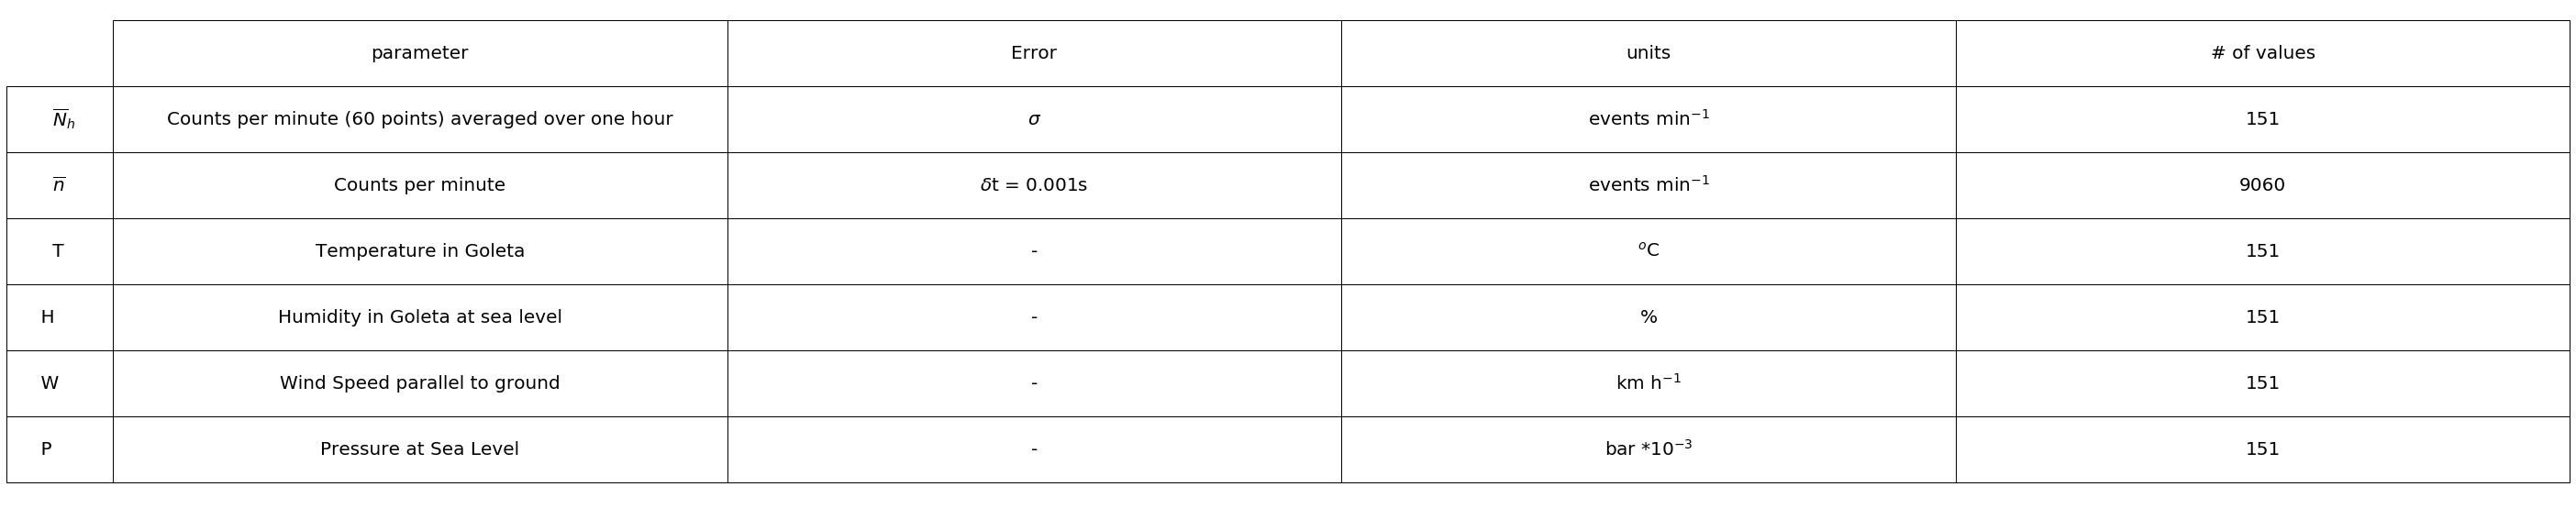

In [66]:
## make a general data table 
columns = ["parameter", "Error", "units", "# of values"]
rows2 = ("      $\overline{N}_h$      ", "      $\overline{n}$      ", "      T     ", "    H    ", "    W     ", "    P    ")
plt.rcParams['figure.figsize'] = [15, 10]

r1 = ["Counts per minute (60 points) averaged over one hour", "$\sigma$", "events min$^{-1}$", str(len(coupled))]
r2 = ["Counts per minute", "$\delta$t = 0.001s", "events min$^{-1}$", str(len(coupled)*60)]
r3 = ["Temperature in Goleta", "-", "$^{o}$C", str(len(coupled))]
r4 = ["Humidity in Goleta at sea level", "-", "%", str(len(coupled))]
r5 = ["Wind Speed parallel to ground", "-", "km h$^{-1}$", str(len(coupled))]
r6 = ["Pressure at Sea Level", "-", "bar $* 10^{-3}$", str(len(coupled))]

cells = [r1, r2, r3, r4, r5, r6]
fig18, axs18 = plt.subplots()
axs18.set_axis_off()
the_table = axs18.table(cellText=cells,
                      rowLabels=rows2, cellLoc ='center',  colWidths=[0.2 for x in columns], 
                      colLabels=columns, loc = "upper left")
the_table.scale(4, 6)
the_table.set_fontsize(50)

# Conclusion 
### [RN] 12:14 

## Overall Look at the Data 


I will call $\overline{N}_h$ the counts per minute averaged over one hour. Data for weather parameters was scraped once an hour. Units for $\overline{N}_h$ are muons detected min$^{-1}$, with muons only being detected at an approximately vertical angle. 

Time uncertainty is $\delta{t}$ < 0.001s, determined by the stretch signal. This uncertainty is very small, given that we are seeing <100 counts per minute.  Thus the uncertainty on the timestamp of each individual incident was not used for error propogation, because by averaging over one minute the uncertainty on the time of each incident does not effect results. Thus uncertainty is therefore considered as:

a) one standard deviation of average of counts per minute over hour, so that each $\overline{N}_h$ represents the average of 60 count per minute values, and $\sigma_{N}$ the standard deviation of those 60 values from the mean $\overline{N}_h$. Thus each $\overline{N}_h$ has uncertainty. *I think that this data will best be presented as a table in the METHODS section.*

$\sigma_{N_h} = \sqrt{\sum_1^{60}{\left(\overline{n}-n\right)^2\frac{1}{60}}}$

b) one standard deviation of $\overline{N}_h$ values used to generate best fit. This is more useful for determining which weather statistics $\overline{N}_h$ is coupled to. 

$\sigma_{\overline{N}_h} = \sqrt{\sum_1^{i}{\left(\overline{N}_{h, measured}-\overline{N}_{h, fit}(X)\right)^2\frac{1}{i}}}$
where X = P, W, H

$\overline{\sigma_{err}} = \frac{\sigma_{\overline{N}_h}}{\sqrt{i}}$


Here is a table for all the discussed parameters. 

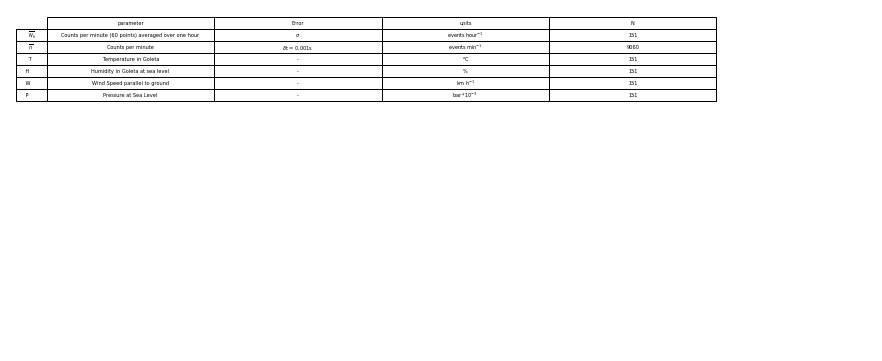

Below is a histogram of all of the $\overline{N}_h$ values measured in the course of the experiment. It does not exhibit clearly gaussian normal distrubution, indicating non-random deviation in measured $\overline{N}_h$ over time. This plot has a gaussian fit to the mean and standard deviation of all the $\overline{N}_h$ values in the data set, normalized to the size of the data set. 

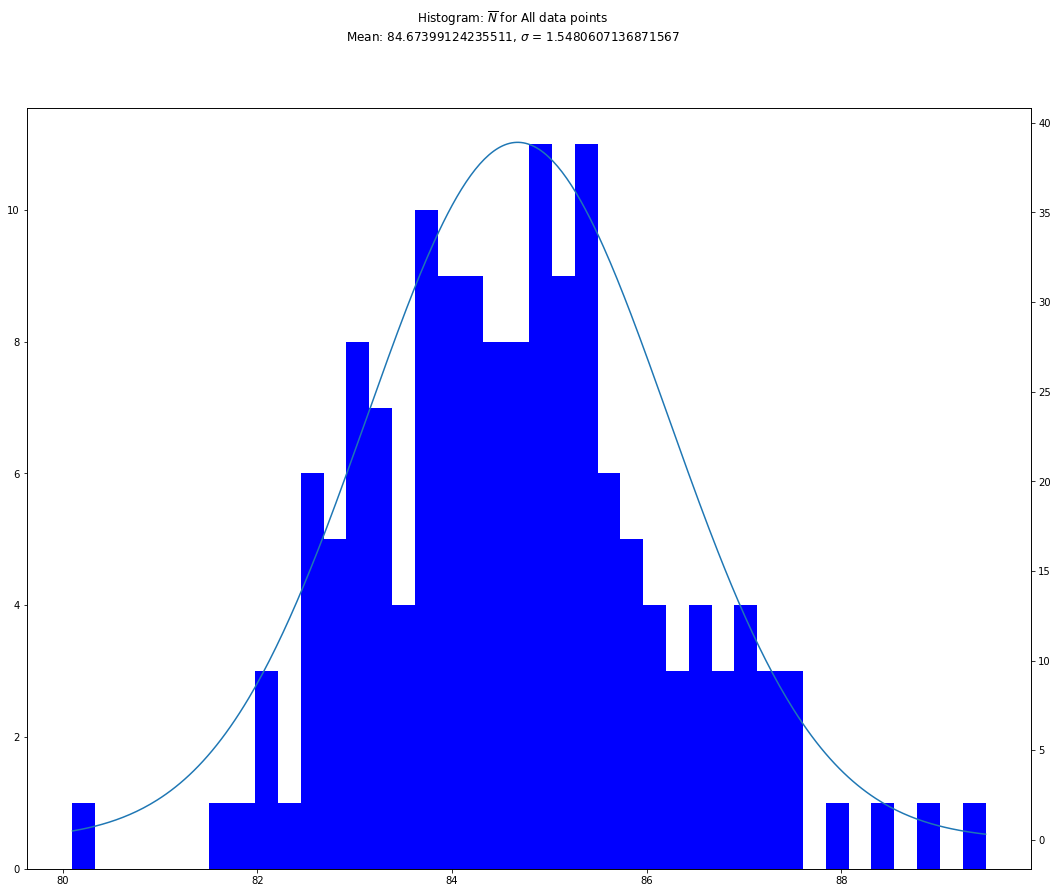

The figure below was generated by slicing the data into four groups. The first bin (Q1) corresponds to the $\overline{N}_h$ collected while the corresponding weather parameter was meausered to be in the lowest four of its total observed range. Q2 contains the $\overline{N}_h$ values measured while the weather paramter is in is the second lowest range. Q3 responds to the third quarter of the given weather paramter, and Q4 the highest quarter. ($\overline{N}_h$ in Q4 mean that the given weather paramer was in the 75th or higher percentile when that $\overline{N}_h$ was measured. Each bin is fitted to a gaussian using the mean and standard deviation of all the $\overline{N}_h$ values in that bin. 

This figure is a bit confusing so I am not sure that we should actually use it in our paper. 
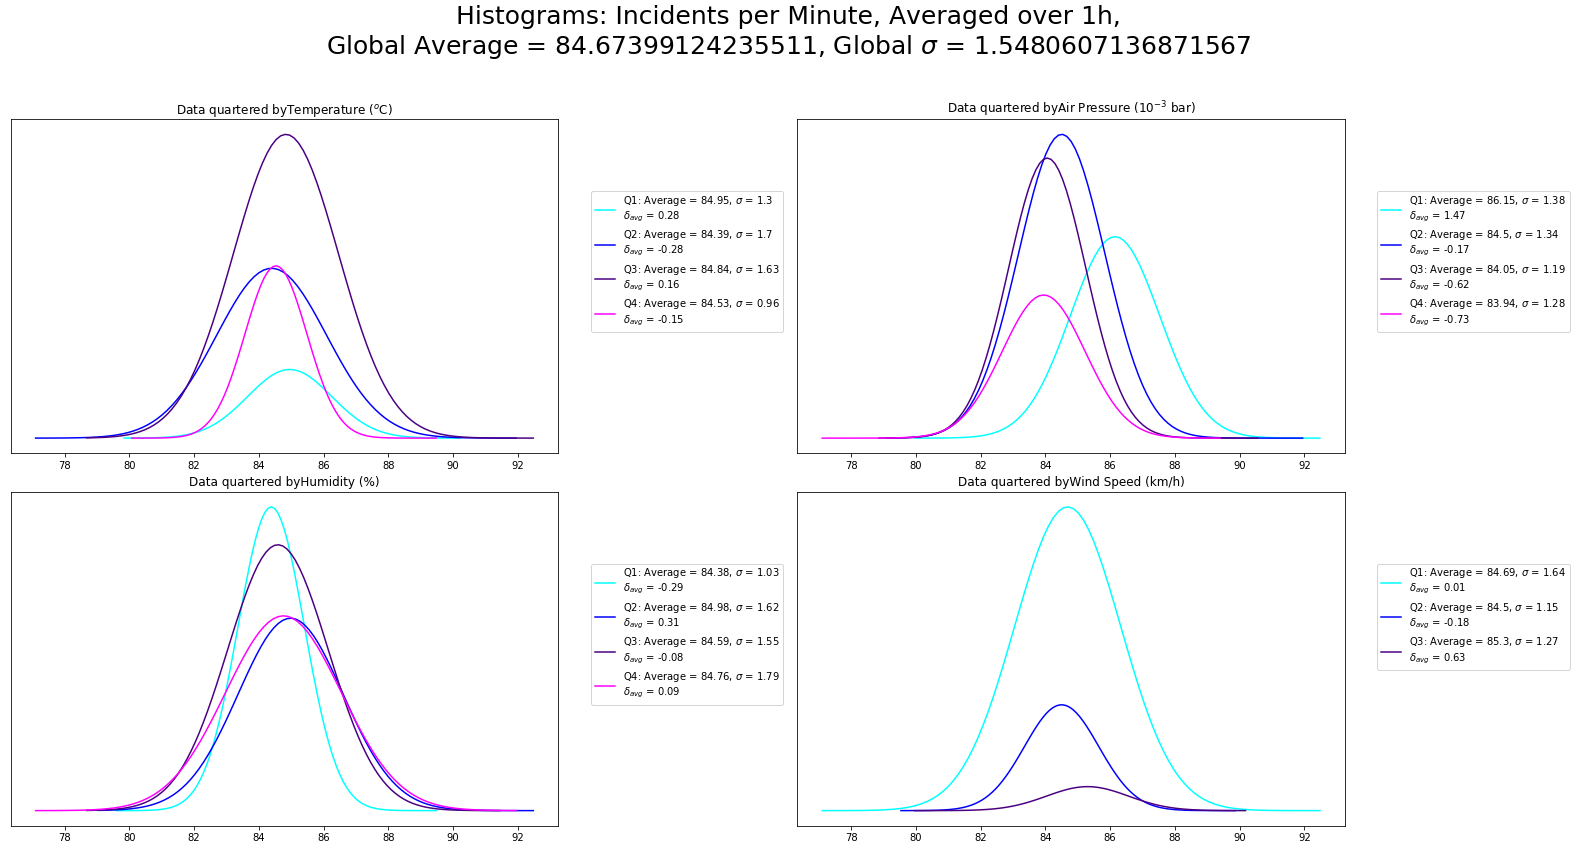


## Correlations
There is a statiscially significant correlation between the wind, humidity, and air pressure data sets and measured $\overline{N}_h$ values. 

*line of best fit was found by minimization of residuals*. 

*Statistical significance was determined by if the first and last values on the line of best fit were not within error of eachother, with error given by standard error using deviation $(\sigma_{\overline{N}_h}$ of measured data values from the value estimated by line of best fit.*


$\overline{N}_h$ shows no dependance on temperature. This is good, as the electronics are known to have some temperature dependance due to false counts caused by thermal excitation. The lack of statistical dependance on temperature observed in this data set validates our experiment. 


Humidity has a large measured range and average counts per minute shows a significant although weak dependance on humidity.

$\overline{N}_h(H) = 84.05+0.013H$

$\sigma(H) = 0.2292454573955731$

H $\equiv$ \% Humidity

Average counts per minute shows a significant dependance on air pressure, but the range in measured air pressure values is very small so it is difficult to quantify or model this relationship. 

$\overline{N}_h(P) =  346.68  -0.258P$

$\sigma(P) = 0.005887322893601946 $

P $\equiv$ Pressure (bar *10^{-3})

Average counts per minute also shows a significant dependance on wind, but the data set has a lot of wind is 0 km/hour points, so again it is very difficult to quantify.

$\overline{N}_h(W) =  84.14   + 0.055W$

$\sigma(W) = 0.2100418222832683  $

W $\equiv$ Wind Speed (km/h)

Parameters are sumarrized in the table below. N is the number of data points 
Below is the plots to visualize this. 

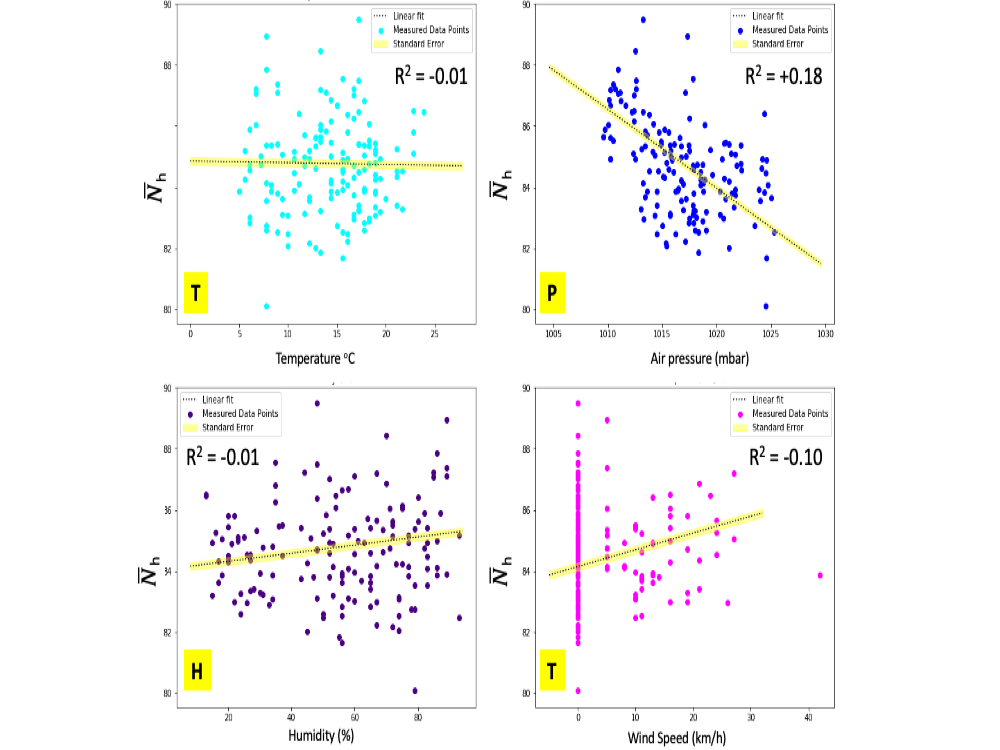


The statistical significance in dependency between $\overline{N}_h$ and wind, air pressure, and temperature demonstrate that these weather paramters are coupled to the frequency at which muons are vertically incident on the earths surface. Due to the limited scope of this study, we cannot confidently claim that the relationship is infact linear. We would need a larger data set. However the combination of our results and literature reiview suggest that a more intensive, costly, and longer term study would be of value to better unravel these relationships. There is also systematic errors which much be taken into account. The following is a list of factors which elaborate on why the conclusions of this study are limited. 


## Error Sources 

1. **Systematic error due to the electronic equiptment.** The voltage threshold for the analog comparator on the detector, or minimum signal strength accepted by the analog circuitry and passed thru the ADC for the rasperry pi to read off is manually set by a potentiometer. Thus the minimum threshold for the signal would vary across different detectors unless more precise resistance is provided, and the average counts per minute will vary across different detectors. *Thus is it important to understand that this study is comparatively valuable.* The statistical significance between $\overline{N}_h$ across different weather paramters is very much valid, but the absolute value of $\overline{N}_h$ due to this systematic error may not be the true value. To improve, more precise resistances must be tested across many detectors by different researchers in different environments to settle upon the most accurate voltage threshold. 

2. **Light sensitivity**. The nature of this detector, which works by photon detection when a muon is incident on scintillating material, means that the detector is light senstive. In this study, the detectors were covered with cloth to remove background light. However it is possible for any disturbances or improper covering to allow photons in from the environment and artificually rise counts per minute. This experiment was designed to alleviate this error in results by measuring over a long period of time, such that small disturbances are averaged out. Analysis shows that the average counts per minute of each hour over the day does not vary significantly. If light leakage was a signficant source of error, we would expect to see significantly more counts during daylight hours than night. 

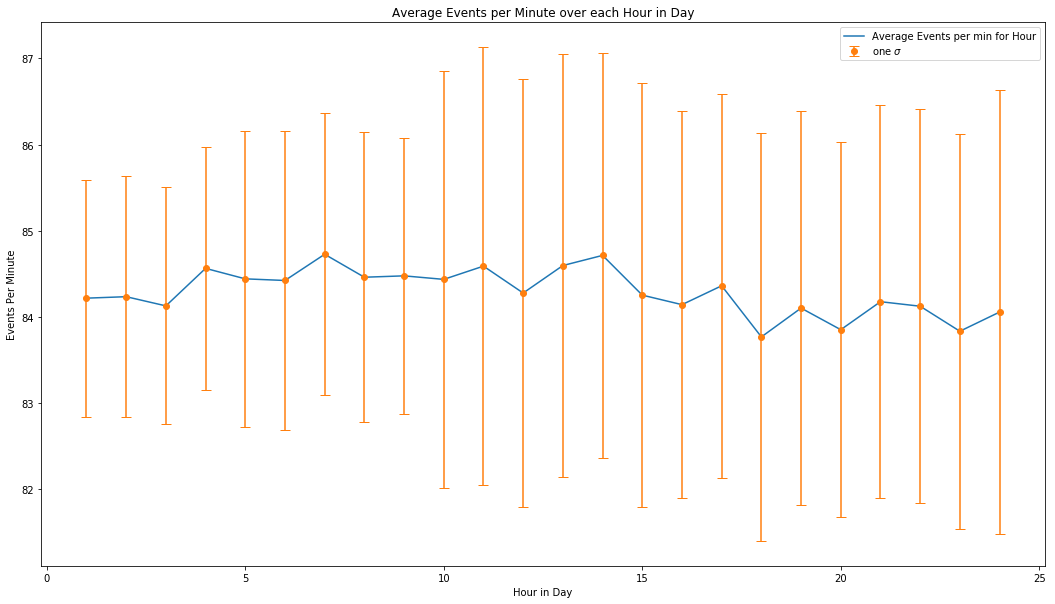

3. **Changes in Weather**. We scraped the weather data provided by NOAA, which is taken by the Goleta airport, only about a mile from our measurement site. Because we did not take this data ourselves, it is hard to say what the error on these values are. Additinally, this data is provided once an hour, while we are collecting data continously. The figures below demonstrate that the variance in weather is stasticially significant on the hour scale, and thus our method is valid for a *comparative* study to evaluate covariance in $\overline{N}_h$ and weather *relative* to eachother. 

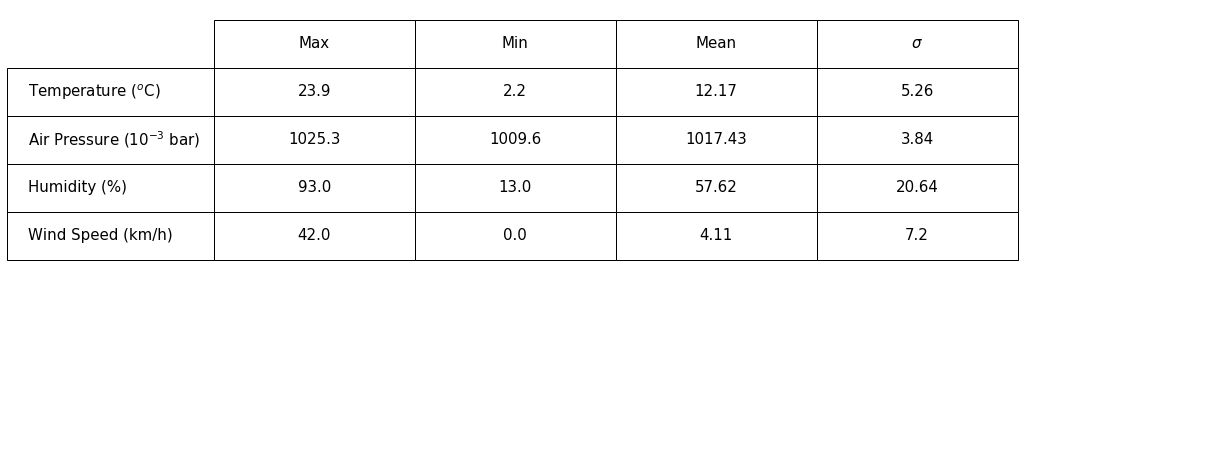!

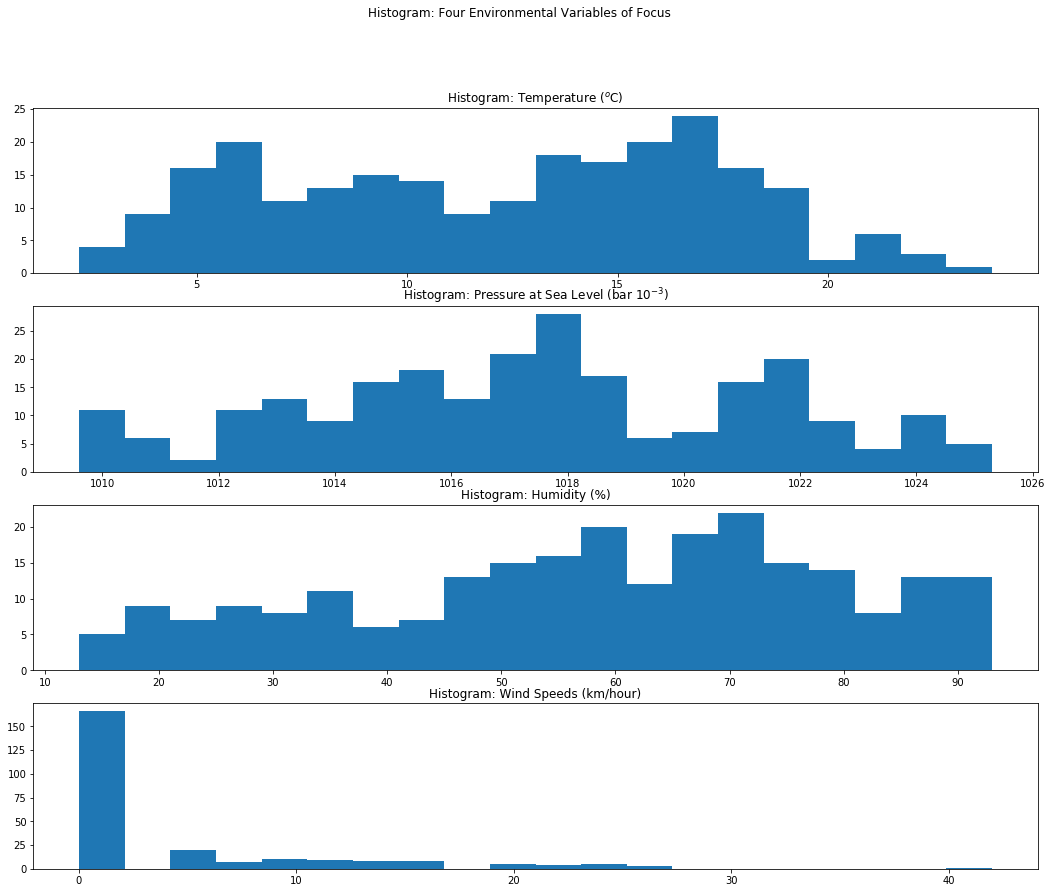

4. **Internet shortages**. My internet has gone down a few times, which resulted in lack of scraped weather data. Loss of internet could be correlated to more extreme weather conditions, which would mean that data points corresponding to more extreme weather conditions were underrepresented in the data set. This also resulted in a smaller data set than expected based purely off the colleciton time frame. 

## Ideas for improvement 

1. **More data**. To properly model $\overline{N}_h$ as a function of P, W, and H, we would need data sets spanning a long time and larger ranges in these environmental factors, lattitudes, and at different altitudes. We would reccomend a larger team of researchers at different locations around the world to gain more insight into systematic errors. Also, there may be changes over the span of time due to factors we did not account for having to do with the motion of the earth. For this reason, *we view our experiments as an initial evaluation of if $\overline{N}_h$ is dependant on environmental factors* and do not claim to be able to quantify those relationships. To truly do so, we would reccomend data colleciton over the span of at least a year in at least two different continents.

2. **Weather time scale**. We live in Goleta, where weather is relatively stable being that it doesnot rapidly change over short periods of time. Therefore we felt it was valid to use weather data collected only once per hour. However, things like wind especially can change rapidly, and higher resolution weather data would lead to a more accurate model. 

3. **Improved Device**. We would reccomend a device which has a set resistance rather than a potentiometer to truly standardize the threshold voltage for which signals are accepted. We would also reccomend a device with more permantnt casing and connections, as the device used in this experiemnt was scrappily put together. It is important that the analog components are not disturbed so as to maintain connections, and casing helps prevent that. Also, jumper wires were used, and ideally wires would be soldered on to secure connections. 
